# **Data Understanding**

MovieLens 20M adalah dataset populer yang digunakan untuk riset sistem rekomendasi. Dataset ini dikelola oleh GroupLens Research Project di University of Minnesota.

Link : https://www.kaggle.com/datasets/grouplens/movielens-20m-dataset

- Ukuran Data: Dataset ini mengandung sekitar 20 juta rating dan 465.564 aplikasi tag.
- Pengguna dan Film: Meliputi interaksi dari 138.493 pengguna pada 27.278 film.
- Periode Waktu: Data ini dibuat oleh pengguna antara 9 Januari 1995 hingga 31 Maret 2015. Dataset ini sendiri dihasilkan pada 17 Oktober 2016 (dengan pembaruan tautan dan penambahan file genome).
- Kriteria Pengguna: Setiap pengguna yang disertakan dalam dataset ini telah memberikan rating setidaknya pada 20 film, memastikan adanya riwayat interaksi yang cukup.

Dataset MovieLens 20M memiliki beberapa file, di antaranya:

**1. Informasi Film (Item/Produk)**

Dalam dataset MovieLens, file movies.csv berfungsi sebagai pusat informasi utama mengenai film. File ini berisi data seperti movieId, title, dan genres. Data ini yang menyimpan informasi inti dari setiap Genre pada film, seperti “Action”, “Comedy”, dan “Drama”.

**2. Fitur Konten Film (Konten Item)**

Untuk mendukung sistem rekomendasi berbasis konten, file tags.csv menyediakan tag-tag yang diberikan oleh pengguna pada film tertentu, misalnya “time travel” atau “mind-bending”. Dalam MovieLens, genre dari movies.csv juga dapat diperlakukan sebagai fitur konten penting.

**3. Profil Pengguna (User/Consumer)**

Dataset MovieLens 20M tidak menyediakan informasi demografis atau preferensi eksplisit pengguna. Namun, preferensi ini dapat diturunkan secara tidak langsung melalui data rating pada file ratings.csv, dengan menganalisis pola perilaku menonton pengguna.

**4. Interaksi Pengguna dan Film (User-Item-Rating)**

File ratings.csv merupakan inti dari sistem rekomendasi dalam dataset ini. File ini mencatat interaksi pengguna dengan film, dalam bentuk rating numerik dari 0.5 hingga 5.0. Data inilah yang digunakan dalam pendekatan collaborative filtering untuk memahami hubungan antar pengguna dan film berdasarkan kesamaan pola rating.

**5. Informasi Tambahan**

Selain itu, file links.csv dalam MovieLens berisi relasi antara movieId dengan ID dari basis data film lain seperti IMDb dan TMDb. File ini berguna untuk integrasi eksternal atau penambahan metadata tambahan jika dibutuhkan.

**Fitur Dataset:**
1. **`movies.csv`** – Metadata Item (Film)
File ini berisi informasi dasar tentang film yang digunakan sebagai item dalam sistem rekomendasi.
    - `movieId` (int): ID unik untuk setiap film
    - `title` (string): Judul lengkap film, termasuk tahun rilis
    - `genres` (string): Kategori genre film, dipisahkan oleh simbol `|` (contoh: `Action|Comedy|Drama`)
     File ini penting dalam pendekatan *content-based filtering* karena genre digunakan sebagai fitur konten untuk menghitung kemiripan antar film.

2. **`ratings.csv`** – User-Item Interaction (Feedback Implisit/Eksplisit)
File ini menyimpan informasi interaksi antara pengguna dan film berupa rating numerik.
    - `userId` (int): ID unik pengguna
    - `movieId` (int): ID film yang dirating
    - `rating` (float): Skor rating (0.5 – 5.0 dalam kelipatan 0.5), mencerminkan preferensi eksplisit
    - `timestamp` (int): Waktu (format UNIX epoch) saat rating diberikan
     File ini merupakan inti dari pendekatan *collaborative filtering*, yang menggunakan pola rating untuk membangun model rekomendasi.


3. **`tags.csv`** – User-Generated Content (Fitur Tambahan Item)
File ini menyimpan tag atau label deskriptif yang diberikan pengguna kepada film, menambahkan informasi semantik tambahan.
    - `userId` (int): ID pengguna
    - `movieId` (int): ID film yang diberi tag
    - `tag` (string): Kata atau frasa yang diberikan pengguna, bisa berupa genre, tema, atau nama tokoh (misal: sci-fi, based on a book, christopher nolan)
    - `timestamp` (int): Waktu tag diberikan
      Informasi dari file ini dapat digunakan untuk memperkaya fitur konten dalam content-based filtering dan untuk analisis preferensi tematik.

4. **`links.csv`** – Eksternal Identifier Mapping
File ini menyediakan koneksi antara ID film dalam MovieLens dengan ID eksternal dari basis data lain seperti IMDb dan TMDb.
    - `movieId` (int): ID film dalam MovieLens
    - `imdbId` (int): ID film dalam IMDb
    - `tmdbId (float): ID film dalam The Movie Database (TMDb); sebagian nilai dapat hilang (NaN)
      File ini berguna jika pengguna ingin menambahkan metadata tambahan dari sumber luar, seperti poster film, sinopsis, atau rating global dari situs eksternal.

## **Import Library**

In [ ]:
# Untuk manipulasi data dan analisis
import pandas as pd
import numpy as np

# Untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk pre-pemrosesan data
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Untuk membangun model sistem rekomendasi
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

# Untuk teknik Matrix Factorization (Contoh: Singular Value Decomposition)
from sklearn.decomposition import TruncatedSVD

# Untuk model yang lebih canggih (jika diperlukan)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Untuk evaluasi model (Contoh: RMSE, precision, recall)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score, recall_score

# Untuk memuat dan menyimpan model
import joblib

# Untuk interaksi dengan Google Cloud Storage
from google.colab import files

# Untuk menangani peringatan (opsional)
import warnings
warnings.filterwarnings('ignore')

### **Insight:**

Secara spesifik, indikator-indikator utamanya adalah:

1. Fokus pada Sistem Rekomendasi: Keberadaan sklearn.metrics.pairwise.cosine_similarity, scipy.sparse.csr_matrix, sklearn.neighbors.NearestNeighbors, sklearn.decomposition.TruncatedSVD, dan pustaka tensorflow/keras secara jelas menunjukkan niat untuk membangun model rekomendasi. Ini mengindikasikan kemungkinan eksplorasi baik Collaborative Filtering (dengan pendekatan berbasis kedekatan seperti KNN dan berbasis dekomposisi matriks seperti SVD), maupun potensi untuk model rekomendasi yang lebih canggih menggunakan Deep Learning (tensorflow, keras).
2. Dukungan untuk Rekomendasi Berbasis Konten (Content-Based Filtering): Adanya sklearn.feature_extraction.text.TfidfVectorizer dan cosine_similarity menyiratkan bahwa proyek ini juga akan mempertimbangkan rekomendasi berbasis konten, kemungkinan dengan mengekstrak fitur dari teks (misalnya, deskripsi film atau tag) dan menghitung kemiripan antar item.
3. Pra-pemrosesan Data dan Visualisasi yang Kuat: Impor pandas dan numpy adalah standar untuk manipulasi data, sementara matplotlib.pyplot dan seaborn menunjukkan komitmen untuk memvisualisasikan data dan hasil model, yang penting untuk pemahaman dan presentasi. MinMaxScaler dan LabelEncoder mengonfirmasi tahap pra-pemrosesan data yang diperlukan.
4. Evaluasi Model yang Komprehensif: Impor mean_squared_error, precision_score, dan recall_score menegaskan bahwa proyek ini akan mengevaluasi kinerja model rekomendasi secara teliti, baik untuk masalah prediksi rating (MSE) maupun tugas klasifikasi/peringkat (presisi/recall).
5. Lingkungan Eksekusi dan Persistensi Model: Impor google.colab.files menunjukkan bahwa skrip ini kemungkinan besar dijalankan di lingkungan Google Colab. Sementara itu, joblib mengindikasikan bahwa model terlatih akan disimpan dan dimuat kembali, memudahkan penggunaan ulang atau deployment.


## **Import Dataset**

In [ ]:
!wget https://files.grouplens.org/datasets/movielens/ml-20m.zip

--2025-05-28 15:05:38--  https://files.grouplens.org/datasets/movielens/ml-20m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 198702078 (189M) [application/zip]
Saving to: ‘ml-20m.zip’

ml-20m.zip          100%[===================>] 189.50M  56.5MB/s    in 3.7s    

2025-05-28 15:05:42 (51.0 MB/s) - ‘ml-20m.zip’ saved [198702078/198702078]



### **Insight:**
- Pengunduhan Dataset MovieLens: Perintah !wget https://files.grouplens.org/datasets/movielens/ml-20m.zip menunjukkan bahwa sebuah dataset bernama "ml-20m.zip" sedang diunduh dari situs files.grouplens.org. Ini kemungkinan besar adalah dataset MovieLens 20M, yang sering digunakan untuk penelitian dan pengembangan sistem rekomendasi.
- Proses Pengunduhan Berhasil: Output dari perintah wget menunjukkan bahwa pengunduhan berhasil. Server merespons dengan 200 OK, dan file sebesar 189 MB (198702078 (189M)) berhasil diunduh dan disimpan sebagai ml-20m.zip.1.

In [ ]:
!unzip ml-20m.zip

Archive:  ml-20m.zip
   creating: ml-20m/
  inflating: ml-20m/genome-scores.csv  
  inflating: ml-20m/genome-tags.csv  
  inflating: ml-20m/links.csv        
  inflating: ml-20m/movies.csv       
  inflating: ml-20m/ratings.csv      
  inflating: ml-20m/README.txt       
  inflating: ml-20m/tags.csv         


### **Insight:**
- Ekstraksi Dataset MovieLens: Perintah !unzip ml-20m.zip menunjukkan bahwa file arsip ml-20m.zip (yang sebelumnya diunduh) sedang diekstrak.
- Isi Dataset MovieLens 20M: Proses unzip menunjukkan bahwa dataset MovieLens 20M ini berisi beberapa file .csv dan satu file .txt. File-file ini kemungkinan besar adalah:
  - ml-20m/genome-scores.csv: Berisi skor relevansi untuk fitur-fitur genome.
  - ml-20m/genome-tags.csv: Berisi tag-tag yang terkait dengan fitur genome.
  - ml-20m/links.csv: Berisi tautan antara ID MovieLens dengan ID dari sumber lain (misalnya, IMDb, TMDB).
  - ml-20m/movies.csv: Berisi informasi tentang film, seperti ID film, judul, dan genre.
  - ml-20m/ratings.csv: Ini adalah file yang paling penting, berisi rating pengguna terhadap film (ID pengguna, ID film, rating, timestamp).
  - ml-20m/README.txt: File teks yang menjelaskan struktur dataset dan informasi tambahan.
  - ml-20m/tags.csv: Berisi tag yang diberikan pengguna ke film.
- Konfirmasi Dataset Siap Digunakan: Setelah proses unzip ini selesai, semua data yang diperlukan untuk menganalisis atau membangun sistem rekomendasi dari dataset MovieLens 20M akan tersedia dalam format CSV yang mudah diakses.

In [ ]:
# Load Dataset MovieLens 20M
movies = pd.read_csv('ml-20m/movies.csv')
ratings = pd.read_csv('ml-20m/ratings.csv')
tags = pd.read_csv('ml-20m/tags.csv')
links = pd.read_csv('ml-20m/links.csv')

# Data Understanding
print('Jumlah film unik: ', len(movies.movieId.unique()))
print('Jumlah pengguna unik: ', len(ratings.userId.unique()))
print('Jumlah interaksi rating pengguna: ', len(ratings))
print('Jumlah tag unik: ', len(tags.tag.unique()))
print('Jumlah film yang diberi tag: ', len(tags.movieId.unique()))
print('Jumlah koneksi ke IMDb/TMDb: ', len(links.movieId.unique()))

Jumlah film unik:  27278
Jumlah pengguna unik:  138493
Jumlah interaksi rating pengguna:  20000263
Jumlah tag unik:  38644
Jumlah film yang diberi tag:  19545
Jumlah koneksi ke IMDb/TMDb:  27278


### **Insight:**
1. Pemuatan Dataset MovieLens 20M dengan Pandas: Kode ini menunjukkan pemuatan beberapa file CSV dari dataset MovieLens 20M ke dalam DataFrame Pandas. Ini adalah langkah awal yang umum dalam analisis data dan machine learning menggunakan Python. File-file yang dimuat adalah:
  - movies.csv
  - ratings.csv
  - tags.csv
  - links.csv

  Ini menunjukkan bahwa semua komponen utama dari dataset akan digunakan.

2. Pemahaman Data Awal (Data Understanding): Setelah memuat data, kode ini melakukan eksplorasi dasar untuk memahami karakteristik dataset. Ini adalah praktik terbaik yang sangat penting dalam setiap proyek data science. Metrik yang diekstrak adalah:

  - Jumlah film unik: len(movies.movieId.unique())
  - Jumlah pengguna unik: len(ratings.userId.unique())
  - Jumlah interaksi rating pengguna: len(ratings) (ini adalah jumlah baris dalam DataFrame ratings, yang merepresentasikan setiap rating yang diberikan)
  - Jumlah tag unik: len(tags.tag.unique())
  - Jumlah film yang diberi tag: len(tags.movieId.unique())
  - Jumlah koneksi ke IMDb/TMDB: len(links.movieId.unique())

3. Statistik Dataset MovieLens 20M yang Terkonfirmasi: Output dari kode ini memberikan angka-angka konkret tentang skala dataset:
  - Jumlah film unik: 27.278 film
  - Jumlah pengguna unik: 138.493 pengguna
  - Jumlah interaksi rating pengguna: 20.000.263 rating (ini mengkonfirmasi dataset MovieLens 20M, yang memang memiliki sekitar 20 juta rating)
  - Jumlah tag unik: 38.644 tag unik
  - Jumlah film yang diberi tag: 19.545 film (ini berarti tidak semua film memiliki tag)
  - Jumlah koneksi ke IMDb/TMDB: 27.278 film (ini menunjukkan bahwa semua film yang ada dalam dataset movies juga memiliki koneksi ke IMDb/TMDB, yang sangat berguna untuk mendapatkan informasi tambahan atau menggabungkan dengan dataset eksternal).

4. Kesiapan untuk Analisis Lanjutan/Model Rekomendasi: Angka-angka ini menunjukkan bahwa dataset MovieLens 20M adalah dataset yang besar dan kaya, siap untuk digunakan dalam membangun dan mengevaluasi sistem rekomendasi, melakukan analisis pola preferensi pengguna, atau penelitian terkait film dan data pengguna. Keberadaan informasi tag dan link juga membuka peluang untuk fitur rekayasa yang lebih kompleks.

# **Univariate Exploratory Data Analysis**

## Movies Variabel

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


### **Insight:**
Perintah movies.info() pada DataFrame movies menunjukkan struktur dan tipe data dari dataset film. Terlihat ada 27.278 entri (film) dengan 3 kolom: movieId (integer), title (object/string), dan genres (object/string). Semua kolom ini non-null, yang berarti tidak ada nilai yang hilang, memastikan kualitas data yang baik untuk analisis. Penggunaan memori sekitar 639.5+ KB menunjukkan bahwa dataset ini relatif kecil dan mudah diolah.

In [ ]:
unique_genres = set()
for genre_list in movies['genres']:
    unique_genres.update(genre_list.split('|'))

print("Jumlah genre unik:", len(unique_genres))
print("Genre yang tersedia:", unique_genres)

Jumlah genre unik: 20
Genre yang tersedia: {'Adventure', 'Thriller', 'IMAX', 'Fantasy', 'War', 'Comedy', 'Film-Noir', 'Mystery', 'Romance', 'Drama', 'Crime', 'Sci-Fi', '(no genres listed)', 'Musical', 'Horror', 'Western', 'Documentary', 'Action', 'Animation', 'Children'}


### **Insight:**
Kode tersebut berhasil mengekstrak dan mengidentifikasi 20 genre film unik dari dataset MovieLens. Ini termasuk genre umum seperti 'Comedy', 'Drama', 'Action', hingga yang spesifik seperti 'Film-Noir' dan 'IMAX', serta kategori '(no genres listed)', menunjukkan dataset memiliki cakupan genre yang luas untuk analisis rekomendasi.

## Ratings Variabel

In [ ]:
ratings.info()
ratings.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 610.4 MB


,userId,movieId,rating,timestamp
count,2.000026e+07,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00,1.100918e+09
std,4.003863e+04,1.978948e+04,1.051989e+00,1.621694e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,3.439500e+04,9.020000e+02,3.000000e+00,9.667977e+08
50%,6.914100e+04,2.167000e+03,3.500000e+00,1.103556e+09
75%,1.036370e+05,4.770000e+03,4.000000e+00,1.225642e+09
max,1.384930e+05,1.312620e+05,5.000000e+00,1.427784e+09


### **Insight:**
- Ukuran Data: Dataset memiliki 20 juta entri (baris), menunjukkan dataset yang sangat besar dan komprehensif untuk analisis rating.
- Kolom dan Tipe Data:
  - userId (int64): ID pengguna.
  - movieId (int64): ID film.
  - rating (float64): Nilai rating, menunjukkan rating bisa berupa desimal.
  - timestamp (int64): Waktu rating diberikan.
- Ringkasan Statistik (Variabel Numerik):
  - userId: Rentang ID pengguna sangat luas (dari 1 hingga sekitar 138 ribu), dengan rata-rata sekitar 69 ribu. Standar deviasi yang besar (sekitar 40 ribu) menunjukkan variasi yang signifikan antar pengguna.
  - movieId: Rentang ID film juga luas (dari 1 hingga sekitar 131 ribu), dengan rata-rata sekitar 90 ribu. Ini menunjukkan dataset mencakup banyak film yang berbeda.
  - rating:
    - Rata-rata rating adalah sekitar 3.52.
    - Rating berkisar dari 0.5 hingga 5.0.
    - Standar deviasi rating relatif kecil (sekitar 1.05), menunjukkan bahwa sebagian besar rating cenderung mengumpul di sekitar rata-rata.
    - Median (50%) rating adalah 3.5, yang hampir sama dengan rata-rata, menunjukkan distribusi rating yang cukup simetris.
  - timestamp: Nilai timestamp yang besar menunjukkan bahwa ini adalah representasi waktu dalam detik atau milidetik sejak epoch, dan perlu diubah ke format tanggal-waktu yang dapat dibaca untuk analisis lebih lanjut.
- Penggunaan Memori: Dataset menggunakan sekitar 610.4 MB memori, yang wajar mengingat ukurannya yang besar.

In [ ]:
print('Jumlah userID:', ratings['userId'].nunique())
print('Jumlah movieID:', ratings['movieId'].nunique())
print('Jumlah data rating:', len(ratings))

Jumlah userID: 138493
Jumlah movieID: 26744
Jumlah data rating: 20000263


### **Insight:**
Kode tersebut menghitung dan menampilkan jumlah unik userID, jumlah unik movieID, dan total jumlah data rating dalam dataset.

- Jumlah unik userID: Ada 138.493 pengguna yang berbeda dalam dataset.
- Jumlah unik movieID: Ada 26.744 film yang berbeda dalam dataset.
- Jumlah data rating: Terdapat total 20.000.263 entri rating.

Ini menunjukkan bahwa dataset ini adalah kumpulan data rating yang sangat besar dan beragam, melibatkan banyak pengguna dan film.

## Tags Variable

In [ ]:
tags.info()
tags.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465564 entries, 0 to 465563
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   userId     465564 non-null  int64 
 1   movieId    465564 non-null  int64 
 2   tag        465548 non-null  object
 3   timestamp  465564 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 14.2+ MB


,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


### **Insight:**
- Ukuran Data: Dataset "Tags" memiliki 465.564 entri (baris), yang merupakan dataset yang cukup besar untuk analisis.
- Kolom dan Tipe Data:
  - userId (int64): ID pengguna yang memberikan tag. Semua 465.564 entri non-null.
  - movieId (int64): ID film yang diberi tag. Semua 465.564 entri non-null.
  - tag (object): Teks tag itu sendiri. Tipe object menunjukkan bahwa ini adalah string (teks). Semua 465.564 entri non-null.
  - timestamp (int64): Waktu tag diberikan. Semua 465.564 entri non-null.
- Ketersediaan Data: Semua kolom memiliki jumlah entri non-null yang sama dengan total entri, yang berarti tidak ada nilai yang hilang (missing values) dalam dataset ini.
- Contoh Data Awal (.head()):
  - Menunjukkan contoh tag seperti "Mark Waters", "dark hero", "noir thriller". Ini mengindikasikan bahwa tag bisa berupa nama sutradara, genre, atau deskripsi lain yang relevan dengan film.
  - Timestamp terlihat dalam format integer besar, kemungkinan Unix timestamp, yang perlu dikonversi ke format tanggal-waktu yang lebih mudah dibaca untuk analisis temporal.
- Penggunaan Memori: Dataset ini menggunakan sekitar 14.2+ MB memori.
- Dataset "Tags" berisi informasi tag yang diberikan pengguna ke film, lengkap dengan ID pengguna, ID film, tag, dan timestamp. Dataset ini bersih dari nilai yang hilang dan siap untuk analisis seperti analisis teks pada kolom tag atau analisis tren penggunaan tag seiring waktu setelah mengonversi kolom timestamp.

## Links Variable

In [ ]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  27278 non-null  int64  
 1   imdbId   27278 non-null  int64  
 2   tmdbId   27026 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 639.5 KB


### **Insight:**
- Ukuran Data: Dataset "Links" memiliki 27.278 entri (baris). Ini adalah dataset yang relatif lebih kecil dibandingkan dengan dataset "Ratings" atau "Tags" sebelumnya.
- Kolom dan Tipe Data:
  - movieId (int64): ID unik untuk film. Semua 27.278 entri non-null.
  - imdbId (int64): ID unik untuk film di IMDb (Internet Movie Database). Semua 27.278 entri non-null.
  - tmdbId (float64): ID unik untuk film di TMDb (The Movie Database). Terdapat 27.026 entri non-null dari total 27.278, menunjukkan adanya nilai yang hilang (missing values) di kolom ini. Tipe data float64 untuk ID ini juga mengindikasikan adanya nilai NaN (Not a Number) untuk missing values.
- Ketersediaan Data:
  - Kolom movieId dan imdbId lengkap (tidak ada nilai yang hilang).
  - Kolom tmdbId memiliki 252 nilai yang hilang (27278 - 27026 = 252). Ini perlu ditangani jika kolom ini akan digunakan dalam analisis atau penggabungan data.
- Penggunaan Memori: Dataset ini menggunakan sekitar 639.5 KB memori, yang sangat efisien.
- Dataset "Links" berfungsi sebagai jembatan untuk menghubungkan movieId internal dengan ID eksternal dari IMDb dan TMDb. Penting untuk dicatat bahwa ada sejumlah kecil nilai tmdbId yang hilang, yang mungkin memerlukan penanganan (misalnya, mengisi dengan nilai default, menghapus baris, atau membiarkannya) tergantung pada tujuan analisis selanjutnya.

# **Visualisasi Data**

In [ ]:
# Set tampilan grafik
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

## **Insight:**
Pengaturan visualisasi menggunakan Seaborn dan Matplotlib untuk menyiapkan plot yang akan datang dengan gaya "whitegrid" dan ukuran gambar yang konsisten, menandakan transisi ke tahap eksplorasi atau presentasi data.
- sns.set(style="whitegrid"): Mengatur gaya (style) default untuk plot seaborn menjadi "whitegrid". Gaya ini biasanya menambahkan grid horizontal dan vertikal berwarna putih di belakang plot, yang seringkali membantu dalam membaca nilai pada grafik.
- plt.rcParams['figure.figsize'] = (10, 5): Mengatur ukuran default untuk semua plot matplotlib yang akan dibuat setelahnya. Ukuran yang ditetapkan adalah 10 inci lebar dan 5 inci tinggi. Ini berguna untuk memastikan konsistensi ukuran plot di seluruh notebook atau script, serta memberikan ukuran yang sesuai agar plot terlihat jelas.

## Distribusi Genre Film

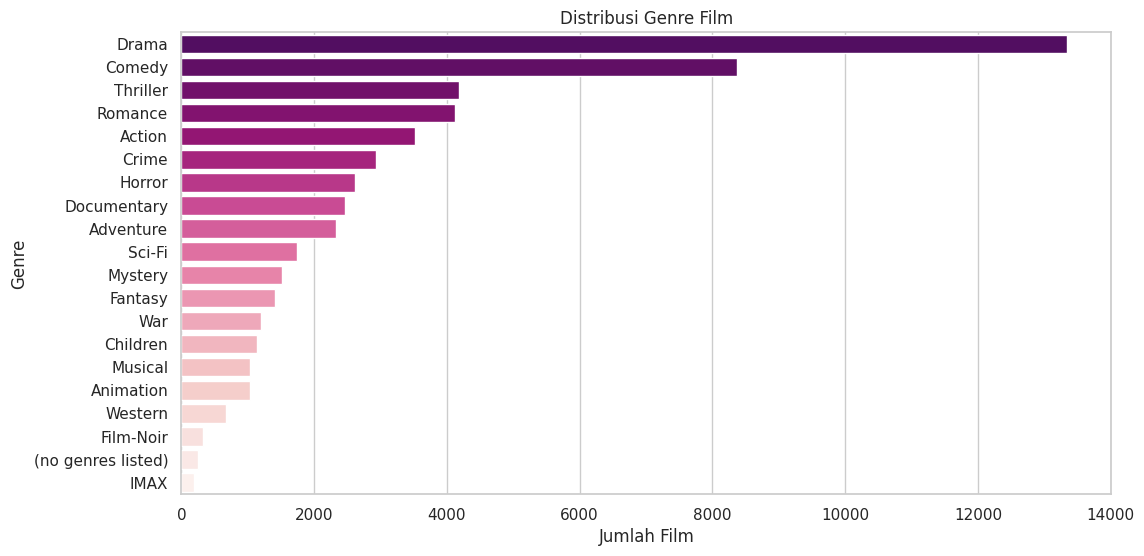

In [ ]:
# Pecah kolom genre menjadi satu per baris
genres_expanded = movies['genres'].str.split('|').explode()
genre_counts = genres_expanded.value_counts()

# Visualisasi genre
plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='RdPu_r')
plt.title('Distribusi Genre Film')
plt.xlabel('Jumlah Film')
plt.ylabel('Genre')
plt.show()

### **Insight:**
Dataset movies memiliki kolom genres yang berisi beberapa genre dipisahkan oleh tanda '|'. Kode di atas memecah setiap entri genre menjadi baris terpisah menggunakan .str.split('|').explode(), lalu menghitung frekuensi kemunculan setiap genre. Hasilnya kemudian divisualisasikan dalam bentuk barplot horizontal untuk menampilkan distribusi genre film.

Dari visualisasi, terlihat jelas bahwa "Drama" adalah genre paling dominan dengan lebih dari 13.000 film, diikuti oleh "Comedy" dan "Thriller" dengan jumlah film yang signifikan. Genre-genre lain seperti "Romance", "Action", dan "Crime" juga memiliki jumlah film yang tinggi, menunjukkan popularitasnya. Di sisi lain, genre seperti "IMAX", "Film-Noir", dan "(no genres listed)" memiliki jumlah film yang sangat sedikit, mengindikasikan bahwa ini mungkin adalah kategori yang kurang umum atau khusus dalam dataset ini.

## Distribusi Rating

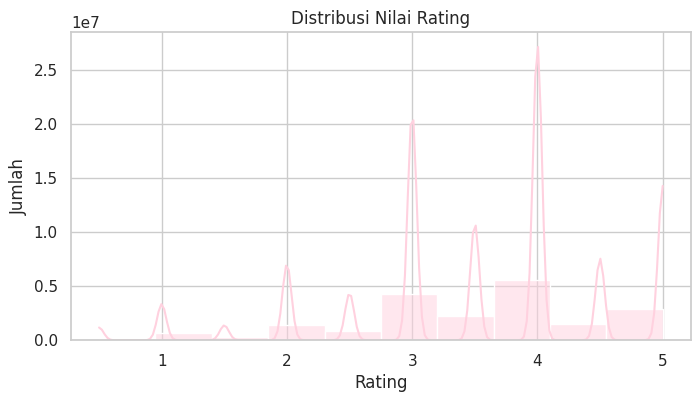

Rata-rata rating: 3.53


In [ ]:
# Visualisasi distribusi rating
plt.figure(figsize=(8,4))
sns.histplot(ratings['rating'], bins=10, kde=True, color='xkcd:light pink')
plt.title('Distribusi Nilai Rating')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.show()

# Rata-rata rating
print('Rata-rata rating:', round(ratings['rating'].mean(), 2))

### **Insight:**
Visualisasi ini menunjukkan distribusi nilai rating dalam dataset. Histogram menampilkan frekuensi kemunculan setiap nilai rating. Terlihat jelas adanya puncak-puncak yang signifikan pada rating bulat seperti 3.0, 4.0, dan 5.0, serta pada rating 0.5. Hal ini menunjukkan kecenderungan pengguna untuk memberikan rating dalam angka bulat atau setengah angka.

Selain itu, nilai rata-rata rating adalah 3.53. Ini mengindikasikan bahwa secara keseluruhan, rating yang diberikan cenderung berada di atas nilai tengah skala (misalnya, jika skala 1-5, tengahnya adalah 3), menunjukkan kecenderungan positif dalam pemberian rating film oleh pengguna.

## Distribusi Jumlah Rating per Film

Film dengan rating terbanyak:
      rating_count  movieId                                      title
293          67310      296                        Pulp Fiction (1994)
352          66172      356                        Forrest Gump (1994)
315          63366      318           Shawshank Redemption, The (1994)
587          63299      593           Silence of the Lambs, The (1991)
476          59715      480                       Jurassic Park (1993)
257          54502      260  Star Wars: Episode IV - A New Hope (1977)
108          53769      110                          Braveheart (1995)
583          52244      589          Terminator 2: Judgment Day (1991)
2486         51334     2571                         Matrix, The (1999)
523          50054      527                    Schindler's List (1993)


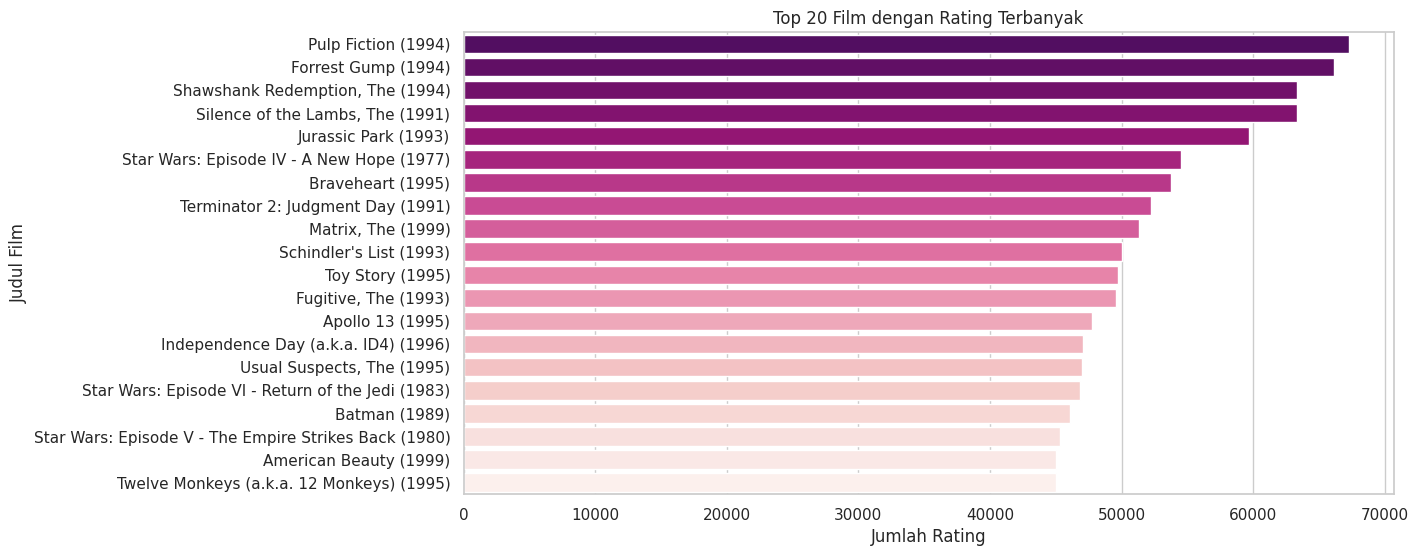

In [ ]:
# Hitung jumlah rating per film
movie_ratings_count = ratings['movieId'].value_counts()

# Gabungkan dengan informasi judul film
movie_ratings_count = pd.merge(movie_ratings_count, movies[['movieId', 'title']], left_index=True, right_on='movieId')

# Ubah nama kolom 'count' menjadi 'rating_count'
movie_ratings_count = movie_ratings_count.rename(columns={'count': 'rating_count'})

# Urutkan berdasarkan jumlah rating terbanyak
movie_ratings_count_sorted = movie_ratings_count.sort_values(by='rating_count', ascending=False)

# Tampilkan 10 film dengan rating terbanyak
print("Film dengan rating terbanyak:")
print(movie_ratings_count_sorted.head(10))

# Visualisasi distribusi jumlah rating per film (Top 20)
plt.figure(figsize=(12, 6))
sns.barplot(x='rating_count', y='title', data=movie_ratings_count_sorted.head(20), palette='RdPu_r')
plt.title('Top 20 Film dengan Rating Terbanyak')
plt.xlabel('Jumlah Rating')
plt.ylabel('Judul Film')
plt.show()

### **Insight:**
Kode tersebut menggabungkan informasi judul film dengan jumlah rating yang diterima oleh setiap film, kemudian mengurutkannya untuk menemukan film-film dengan rating terbanyak. Hasilnya menampilkan daftar 20 film teratas berdasarkan jumlah rating yang diterima, beserta visualisasi barplot horizontal.

Dari output dan grafik, terlihat bahwa "Pulp Fiction (1994)" menduduki peringkat teratas sebagai film dengan rating terbanyak, diikuti oleh "Forrest Gump (1994)" dan "Shawshank Redemption, The (1994)". Ini menunjukkan bahwa film-film ini sangat populer dan banyak diulas oleh pengguna dalam dataset. Distribusi jumlah rating menunjukkan penurunan bertahap dari film teratas hingga film ke-20, namun semua film dalam daftar ini jelas memiliki jumlah interaksi yang sangat tinggi dari para pengguna.

## Distribusi Jumlah Rating per User

Pengguna paling aktif memberikan rating:
userId
118205    9254
8405      7515
82418     5646
121535    5520
125794    5491
74142     5447
34576     5356
131904    5330
83090     5169
59477     4988
Name: count, dtype: int64


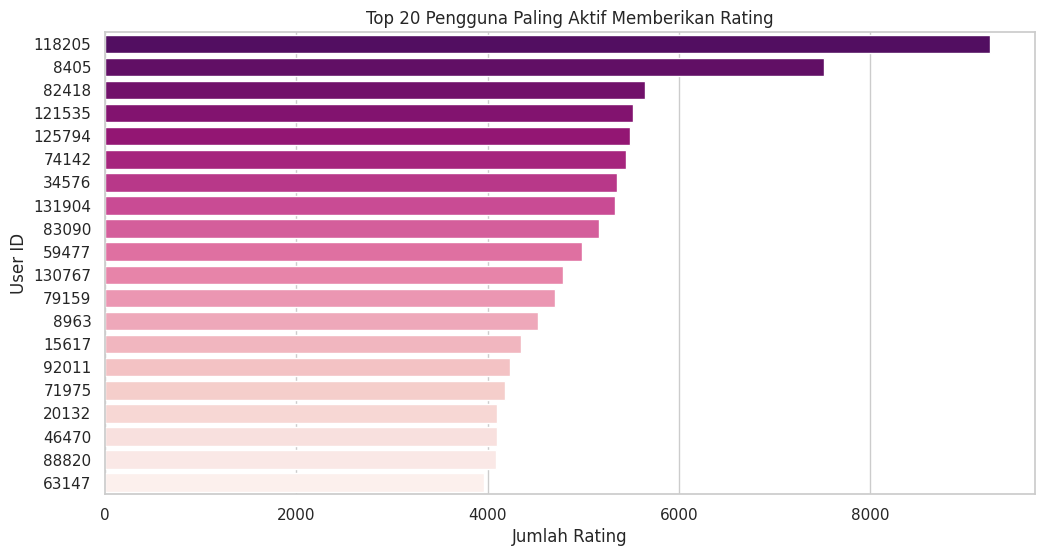

In [ ]:
user_ratings_count = ratings['userId'].value_counts()

# Urutkan berdasarkan jumlah rating terbanyak
user_ratings_count_sorted = user_ratings_count.sort_values(ascending=False)

# Tampilkan 10 pengguna dengan rating terbanyak
print("Pengguna paling aktif memberikan rating:")
print(user_ratings_count_sorted.head(10))

# Visualisasi distribusi jumlah rating per user (Top 20)
plt.figure(figsize=(12, 6))
sns.barplot(x=user_ratings_count_sorted.head(20).values, y=user_ratings_count_sorted.head(20).index.astype(str), palette='RdPu_r')
plt.title('Top 20 Pengguna Paling Aktif Memberikan Rating')
plt.xlabel('Jumlah Rating')
plt.ylabel('User ID')
plt.show()

### **Insight:**
Kode tersebut mengidentifikasi dan memvisualisasikan 20 pengguna paling aktif (yang memberikan rating terbanyak) dalam dataset. Ini dilakukan dengan menghitung frekuensi kemunculan setiap UserID, mengurutkannya secara menurun, dan mengambil 20 teratas.

Dari hasil output dan grafik, terlihat bahwa UserID 118205 adalah pengguna paling aktif dengan lebih dari 8000 rating, diikuti oleh UserID 8405 dan UserID 82418. Kehadiran pengguna-pengguna super aktif ini sangat signifikan karena kontribusi mereka terhadap data rating sangat besar. Informasi ini dapat berguna untuk memahami pola interaksi pengguna dan mengidentifikasi "power user" yang mungkin memiliki pengaruh lebih besar pada rekomendasi atau analisis perilaku.

## Distribusi Tag

Jumlah tag unik: 38643


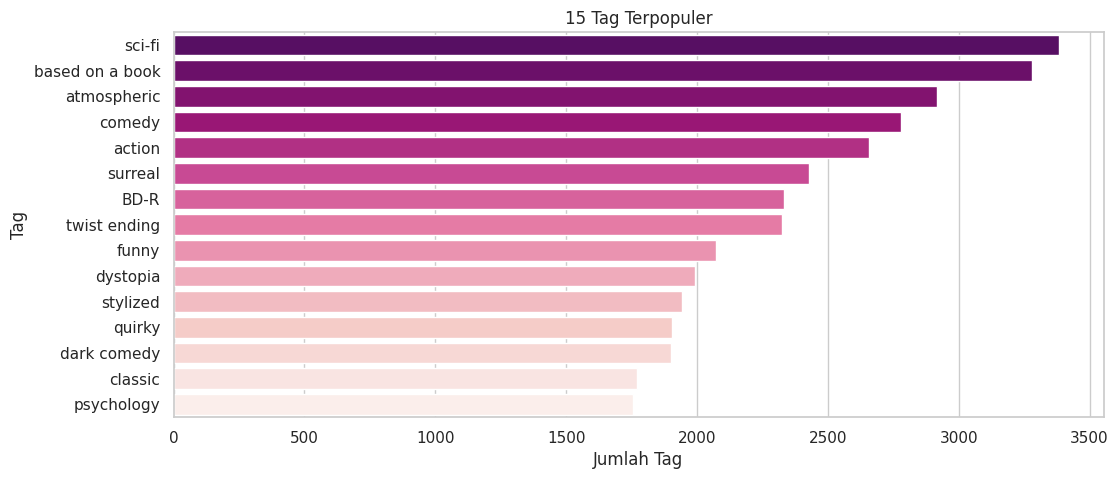

In [ ]:
# Hitung jumlah tag unik
print("Jumlah tag unik:", tags['tag'].nunique())

# Top 15 tag yang paling sering digunakan
top_tags = tags['tag'].value_counts().head(15)

plt.figure(figsize=(12,5))
sns.barplot(x=top_tags.values, y=top_tags.index, palette='RdPu_r')
plt.title('15 Tag Terpopuler')
plt.xlabel('Jumlah Tag')
plt.ylabel('Tag')
plt.show()

### **Insight:**
Kode tersebut menghitung jumlah tag unik dalam dataset dan kemudian mengidentifikasi serta memvisualisasikan 15 tag yang paling sering digunakan. Teridentifikasi ada 38.643 tag unik, menunjukkan kekayaan dan variasi dalam cara pengguna mengategorikan atau mendeskripsikan film.

Dari visualisasi barplot, "sci-fi" adalah tag paling populer, diikuti oleh "based on a book" dan "atmospheric". Popularitas tag-tag ini memberikan gambaran tentang genre atau karakteristik film yang paling sering menjadi fokus perhatian pengguna saat memberikan tag. Keberadaan tag seperti "dark comedy" dan "psychology" juga menunjukkan kekayaan dalam deskripsi nuansa film yang diberikan oleh pengguna.

# **Data Preprocessing**

## Menggabungkan Data Rating dan Movie Metadata

In [ ]:
# Menggabungkan data rating dengan informasi film (judul dan genre)
movie_ratings = pd.merge(ratings, movies, on='movieId', how='left')
movie_ratings.head()

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,1112486027,Jumanji (1995),Adventure|Children|Fantasy
1,1,29,3.5,1112484676,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
2,1,32,3.5,1112484819,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,3.5,1112484727,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,3.5,1112484580,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


### **Insight:**
Melakukan penggabungan data rating film dengan informasi film (judul dan genre) menggunakan fungsi pd.merge di Python. Hasil penggabungan ini menghasilkan sebuah DataFrame baru bernama movie_ratings yang berisi kolom userId, movieId, rating, timestamp, title, dan genres. Hal ini memungkinkan kita untuk melihat rating yang diberikan oleh setiap pengguna pada film-film tertentu, lengkap dengan judul dan genre film tersebut.

DataFrame movie_ratings yang ditampilkan menunjukkan beberapa baris pertama dari data yang telah digabungkan. Sebagai contoh, pengguna dengan userId 1 memberikan rating 3.5 untuk film "Jumanji (1995)" yang bergenre "Adventure|Children|Fantasy". Penggabungan data ini merupakan langkah penting dalam analisis data film karena menyatukan informasi dari berbagai sumber, sehingga memudahkan untuk mendapatkan wawasan tentang preferensi pengguna, popularitas film berdasarkan rating, atau bahkan untuk membangun sistem rekomendasi.

Sekarang movie_ratings akan berisi:
- userId
- movieId
- rating
- timestamp
- title
- genres

## Memeriksa Missing Value

In [ ]:
movie_ratings.isnull().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0
title,0
genres,0


### **Insight:**
Melakukan pemeriksaan missing value (nilai yang hilang) pada DataFrame movie_ratings menggunakan perintah movie_ratings.isnull().sum(). Hasilnya menunjukkan bahwa tidak ada missing value sama sekali di setiap kolom (userId, movieId, rating, timestamp, title, dan genres).

Ini adalah hasil yang sangat baik dalam tahap pra-pemrosesan data, karena ketiadaan missing value berarti data sudah bersih dan tidak memerlukan penanganan khusus seperti imputasi atau penghapusan baris/kolom yang berisi missing value. Hal ini memastikan bahwa analisis atau pemodelan data yang akan dilakukan selanjutnya dapat berjalan tanpa hambatan yang disebabkan oleh data yang tidak lengkap, sehingga menghasilkan analisis yang lebih akurat dan dapat diandalkan.

## Menggabungkan Tags

In [ ]:
# Gabungkan tags dengan movie_ratings
movie_ratings_tags = pd.merge(movie_ratings, tags[['userId', 'movieId', 'tag']],
                              on=['userId', 'movieId'], how='left')

movie_ratings_tags.head()

,userId,movieId,rating,timestamp,title,genres,tag
0,1,2,3.5,1112486027,Jumanji (1995),Adventure|Children|Fantasy,NaN
1,1,29,3.5,1112484676,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,NaN
2,1,32,3.5,1112484819,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,NaN
3,1,47,3.5,1112484727,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,NaN
4,1,50,3.5,1112484580,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,NaN


### **Insight:**
Operasi penggabungan (merge) telah dilakukan antara dataframe movie_ratings dan tags. Tujuan dari penggabungan ini adalah untuk menambahkan informasi tag ke dalam data rating film. Namun, dari output movie_ratings_tags.head() yang ditampilkan, kolom 'tag' hanya berisi nilai NaN (Not a Number) untuk semua baris yang terlihat.

Ini mengindikasikan bahwa meskipun penggabungan dilakukan berdasarkan 'userId' dan 'movieId', tidak ada kecocokan tag yang ditemukan untuk entri-entri film awal dalam dataframe movie_ratings. Kemungkinan penyebabnya adalah data tags mungkin tidak memiliki tag yang sesuai untuk film-film ini, atau mungkin ada ketidaksesuaian dalam data 'userId' atau 'movieId' antara kedua dataframe, meskipun hal ini kurang mungkin terjadi jika penggabungan dilakukan dengan benar. Untuk mendapatkan insight yang lebih lengkap, perlu diperiksa lebih lanjut isi dari dataframe tags dan bagaimana distribusi tag yang sebenarnya.

## Final Data

In [ ]:
final_data = movie_ratings_tags[['userId', 'movieId', 'title', 'genres', 'rating', 'tag']]
final_data.head()

,userId,movieId,title,genres,rating,tag
0,1,2,Jumanji (1995),Adventure|Children|Fantasy,3.5,NaN
1,1,29,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,3.5,NaN
2,1,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,3.5,NaN
3,1,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,3.5,NaN
4,1,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,3.5,NaN


### **Insight:**
Dataframe baru bernama final_data telah dibuat dengan memilih kolom-kolom tertentu dari dataframe movie_ratings_tags yang telah ada sebelumnya. Kolom-kolom yang dipilih adalah 'userId', 'movieId', 'title', 'genres', 'rating', dan 'tag'.

Output final_data.head() menunjukkan lima baris pertama dari dataframe yang dihasilkan. Seperti yang telah diamati pada analisis sebelumnya, kolom 'tag' masih menunjukkan nilai NaN (Not a Number) untuk semua baris yang ditampilkan. Hal ini mengkonfirmasi bahwa proses pemilihan kolom tidak mengubah fakta bahwa tidak ada data tag yang cocok untuk film-film awal ini dalam dataframe movie_ratings_tags yang menjadi sumbernya. Dengan kata lain, final_data saat ini masih belum memiliki informasi tag yang lengkap untuk film-film tersebut, sehingga kolom 'tag' belum memberikan nilai tambah dalam analisis ini.

# **Data Preparation**

## Cek Missing Values

In [ ]:
# Mengecek missing values
final_data.isnull().sum()

,0
userId,0
movieId,0
title,0
genres,0
rating,0
tag,19874181


### **Insight:**
Pengecekan nilai yang hilang (missing values) dalam dataframe final_data menggunakan final_data.isnull().sum(). Hasilnya menunjukkan jumlah nilai yang hilang untuk setiap kolom:

- userId: 0
- movieId: 0
- title: 0
- genres: 0
- rating: 0
- tag: 19874181

Hampir semua kolom (userId, movieId, title, genres, rating) tidak memiliki nilai yang hilang, yang berarti data pada kolom-kolom ini sudah lengkap. Namun, kolom tag memiliki jumlah nilai yang hilang yang sangat besar, yaitu 19.874.181. Ini mengkonfirmasi pengamatan sebelumnya bahwa kolom 'tag' mayoritas berisi NaN setelah operasi penggabungan. Jumlah nilai hilang yang sangat signifikan ini menunjukkan bahwa informasi tag tidak tersedia untuk sebagian besar entri film dan rating dalam dataset gabungan. Hal ini bisa menjadi masalah serius jika analisis atau model yang akan dibangun sangat bergantung pada informasi tag. Langkah selanjutnya mungkin perlu mempertimbangkan strategi untuk menangani nilai yang hilang pada kolom 'tag', seperti mengisi dengan nilai tertentu (misalnya, 'no_tag' atau 'unknown'), menghapus baris yang memiliki nilai hilang pada kolom tag (jika jumlahnya tidak terlalu besar dan tidak signifikan), atau melakukan analisis terpisah untuk entri yang memiliki tag dan yang tidak.

In [ ]:
# Membersihkan missing value dengan fungsi dropna()
final_data = final_data.dropna()
final_data.isnull().sum()
final_data

,userId,movieId,title,genres,rating,tag
7453,65,27866,In My Father's Den (2004),Drama,4.0,New Zealand
7461,65,48082,"Science of Sleep, The (La science des rêves) (...",Comedy|Drama|Fantasy|Romance,4.5,surreal
7462,65,48082,"Science of Sleep, The (La science des rêves) (...",Comedy|Drama|Fantasy|Romance,4.5,unusual
7467,65,58652,CJ7 (Cheung Gong 7 hou) (2008),Children|Comedy|Sci-Fi,5.0,cute
7468,65,58652,CJ7 (Cheung Gong 7 hou) (2008),Children|Comedy|Sci-Fi,5.0,emotional
...,...,...,...,...,...,...
20259539,138446,55999,Mr. Magorium's Wonder Emporium (2007),Children|Comedy|Fantasy,2.5,dragged
20259540,138446,55999,Mr. Magorium's Wonder Emporium (2007),Children|Comedy|Fantasy,2.5,Jason Bateman
20259541,138446,55999,Mr. Magorium's Wonder Emporium (2007),Children|Comedy|Fantasy,2.5,quirky
20259542,138446,55999,Mr. Magorium's Wonder Emporium (2007),Children|Comedy|Fantasy,2.5,sad


### **Insight:**
- Penanganan Missing Value: Kode final_data = final_data.dropna() menghapus semua baris yang mengandung setidaknya satu nilai NaN. Mengingat hasil pengecekan missing value sebelumnya menunjukkan bahwa kolom 'tag' memiliki jumlah NaN yang sangat besar (sekitar 19 juta), dapat disimpulkan bahwa operasi dropna() ini secara efektif menghapus hampir semua baris yang tidak memiliki tag.
- Dampak pada Ukuran Data: Setelah operasi dropna(), ukuran dataframe final_data yang baru adalah 391.444 baris dan 6 kolom. Ini merupakan penurunan yang sangat drastis dari jumlah baris awal (yang kemungkinan besar jutaan, mengingat ada 19 juta NaN di kolom 'tag'). Penurunan drastis ini menunjukkan bahwa sebagian besar data awal tidak memiliki informasi tag.
- Data yang Tersisa: Data yang tersisa (391.444 baris) adalah subset dari data asli yang hanya berisi entri di mana kolom 'tag' memiliki nilai yang valid (tidak NaN). Ini berarti bahwa final_data yang sekarang hanya mengandung pasangan (userId, movieId) yang memiliki informasi tag.
- Implikasi Analisis: Dengan menghapus baris yang memiliki nilai NaN pada kolom 'tag', dataset sekarang lebih bersih dan siap untuk analisis yang membutuhkan informasi tag. Namun, perlu diingat bahwa ini juga berarti data yang tersisa mungkin tidak lagi merepresentasikan keseluruhan dataset awal, karena sebagian besar data telah dibuang. Analisis selanjutnya hanya akan berlaku untuk subset data yang memiliki tag. Hal ini penting untuk dipertimbangkan agar tidak menarik kesimpulan yang salah mengenai keseluruhan perilaku pengguna atau popularitas film jika hanya menggunakan data ini.

## Cek dan Bershikan Duplikat

In [ ]:
print('Jumlah data duplikat:', final_data.duplicated().sum())

Jumlah data duplikat: 0


### **Insight:**
- Tidak Ada Data Duplikat: Hasil dari pengecekan menunjukkan Jumlah data duplikat: 0. Ini berarti setelah proses pembersihan nilai yang hilang (dengan dropna()), tidak ada baris yang sepenuhnya identik dalam dataframe final_data yang tersisa.
- Kualitas Data: Tidak adanya data duplikat adalah indikator yang baik untuk kualitas data, karena duplikat dapat menyebabkan bias dalam analisis atau pemodelan. Ini menunjukkan bahwa setiap entri dalam final_data (yang sekarang hanya berisi data dengan tag yang valid) adalah unik berdasarkan kombinasi semua kolomnya.
- Implikasi untuk Analisis Selanjutnya: Dengan tidak adanya duplikat, analisis atau model yang akan dibangun di kemudian hari akan beroperasi pada dataset yang bersih dan setiap pengamatan (baris) akan merepresentasikan informasi yang berbeda. Ini sangat penting untuk memastikan keakuratan hasil dan menghindari perhitungan berulang yang tidak perlu.

# **Model Development Content Based Filtering**

In [ ]:
data = final_data.copy()
data.head()

,userId,movieId,title,genres,rating,tag
7453,65,27866,In My Father's Den (2004),Drama,4.0,New Zealand
7461,65,48082,"Science of Sleep, The (La science des rêves) (...",Comedy|Drama|Fantasy|Romance,4.5,surreal
7462,65,48082,"Science of Sleep, The (La science des rêves) (...",Comedy|Drama|Fantasy|Romance,4.5,unusual
7467,65,58652,CJ7 (Cheung Gong 7 hou) (2008),Children|Comedy|Sci-Fi,5.0,cute
7468,65,58652,CJ7 (Cheung Gong 7 hou) (2008),Children|Comedy|Sci-Fi,5.0,emotional


### **Insight:**
- Pembuatan Salinan Data: Baris kode data = final_data.copy() menunjukkan bahwa sebuah salinan dari dataframe final_data telah dibuat dan disimpan dalam variabel baru bernama data. Ini adalah praktik yang baik dalam pengembangan model, karena memungkinkan kita untuk melakukan transformasi atau manipulasi pada data tanpa secara langsung mengubah final_data yang asli. Ini menjaga integritas data asli jika kita perlu kembali ke keadaan sebelumnya atau mencoba pendekatan yang berbeda.
- Dataset untuk Model: Output data.head() menampilkan lima baris pertama dari dataframe data yang baru, yang sama persis dengan final_data.head() yang terakhir kita lihat setelah penghapusan nilai NaN dan pengecekan duplikat. Ini menegaskan bahwa data sekarang berisi dataset yang bersih, bebas dari nilai yang hilang di kolom 'tag' dan duplikasi baris, siap untuk digunakan dalam pengembangan model Content Based Filtering.
- Fokus pada Content-Based Filtering: Judul bagian "Model Development Content Based Filtering" menunjukkan bahwa tujuan selanjutnya adalah membangun sistem rekomendasi berbasis konten. Dalam konteks ini, kolom seperti genres dan tag akan menjadi sangat penting karena mereka menyediakan informasi deskriptif tentang konten film. Model akan belajar dari fitur-fitur ini untuk merekomendasikan film kepada pengguna berdasarkan kesamaan konten dengan film yang mereka sukai.


## TF-IDF Vectorization

In [ ]:
# Ambil sampel 5000 film
data = data.sample(n=5000, random_state=42).reset_index(drop=True)

# Ambil movieIds yang ada di subset data yang sudah disampling
sampled_movie_ids = data['movieId'].unique()

# Filter DataFrame movies agar hanya berisi film-film ini
movies = movies[movies['movieId'].isin(sampled_movie_ids)]

# Opsional: Reset index jika diperlukan untuk operasi selanjutnya
movies = movies.reset_index(drop=True)

### **Insight:**
- Pengambilan Sampel Data: Baris kode data = data.sample(n=5000, random_state=42).reset_index(drop=True) menunjukkan bahwa hanya 5000 film yang diambil secara acak dari dataframe data yang lebih besar. Pengambilan sampel ini sering dilakukan untuk mengurangi ukuran dataset, yang dapat mempercepat proses komputasi, terutama pada langkah-langkah seperti TF-IDF Vectorization yang bisa sangat intensif secara komputasi jika diterapkan pada dataset yang sangat besar. random_state=42 memastikan bahwa sampel yang diambil akan selalu sama setiap kali kode dijalankan, menjadikannya dapat direplikasi. reset_index(drop=True) mengatur ulang indeks dataframe setelah pengambilan sampel.
- Pemfilteran Film Relevan: Setelah mengambil sampel data, kode kemudian mengidentifikasi movieId unik dari sampel tersebut (sampled_movie_ids = data['movieId'].unique()). Selanjutnya, dataframe movies (yang diasumsikan berisi metadata lengkap semua film) difilter untuk hanya menyertakan film-film yang movieId-nya ada dalam sampled_movie_ids. Ini penting untuk memastikan bahwa hanya metadata film yang relevan dengan sampel 5000 film yang akan digunakan dalam proses TF-IDF.
- Efisiensi Komputasi: Seluruh langkah ini bertujuan untuk meningkatkan efisiensi komputasi. Dengan membatasi jumlah film yang akan diolah untuk TF-IDF menjadi 5000, waktu pemrosesan dan kebutuhan memori akan jauh berkurang, memungkinkan eksplorasi dan pengembangan model yang lebih cepat. Namun, perlu diingat bahwa model yang dibangun dari sampel 5000 film mungkin tidak sepenuhnya merepresentasikan keseluruhan dataset film yang lebih besar. Hal ini perlu dipertimbangkan saat mengevaluasi kinerja dan generalisasi model.

In [ ]:
# Bersihkan data genre
movies['genres'] = movies['genres'].replace('(no genres listed)', '', regex=False).str.replace('|', ' ', regex=False)

# Inisialisasi TF-IDF Vectorizer
tfv = TfidfVectorizer()

# Fit TF-IDF ke genre
tfv.fit(movies['genres'])

# Lihat fitur genre
tfv.get_feature_names_out()

array(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'fi', 'film', 'horror', 'imax',
       'musical', 'mystery', 'noir', 'romance', 'sci', 'thriller', 'war',
       'western'], dtype=object)

### **Insight:**
1. Pembersihan Data Genre: Baris kode pertama movies['genres'] = movies['genres'].replace('(no genres listed)', '', regex=False).str.replace('|', ',', regex=False) bertujuan untuk membersihkan data pada kolom 'genres'.
  - replace('(no genres listed)', '', regex=False): Ini mengganti string "(no genres listed)" dengan string kosong. Hal ini penting karena "(no genres listed)" adalah placeholder yang tidak relevan untuk analisis konten dan dapat mengganggu proses vectorization.
  - str.replace('|', ',', regex=False): Ini mengganti karakter | (yang biasa digunakan untuk memisahkan genre) dengan koma ,. Tujuan dari penggantian ini kemungkinan untuk memformat ulang string genre agar lebih mudah diurai atau diproses oleh TfidfVectorizer, meskipun TfidfVectorizer biasanya dapat menangani string dengan spasi sebagai pemisah default. Jika ini bertujuan untuk menggabungkan genre yang dipisahkan oleh | menjadi satu string dengan pemisah koma, maka ini akan menciptakan "token" yang berbeda untuk setiap genre yang dipisahkan oleh koma.

2. Inisialisasi dan Fitting TF-IDF Vectorizer:
  - tfv = TfidfVectorizer(): Sebuah objek TfidfVectorizer diinisialisasi. TF-IDF (Term Frequency-Inverse Document Frequency) adalah teknik yang digunakan untuk mengubah teks menjadi representasi numerik, di mana setiap kata atau "term" diberi bobot berdasarkan seberapa sering muncul dalam dokumen (film) dan seberapa unik kata tersebut di seluruh korpus (semua film).
  - tfv.fit(movies['genres']): Vectorizer ini kemudian "dilatih" (fitted) pada kolom 'genres' dari dataframe movies. Proses fit ini mempelajari semua genre unik (atau "term") yang ada di seluruh dataset dan membangun kosakata internalnya.

3. Ekstraksi Fitur Genre:
  - tfv.get_feature_names_out(): Setelah fit, fungsi ini dipanggil untuk melihat daftar fitur (yaitu, genre unik) yang telah dipelajari oleh TfidfVectorizer. Outputnya adalah array yang berisi semua genre yang terdeteksi, seperti 'action', 'adventure', 'animation', 'children', 'comedy', dll.

Secara keseluruhan, langkah-langkah ini menyiapkan data genre untuk diubah menjadi format numerik yang dapat digunakan oleh model Content Based Filtering. TF-IDF akan memberikan bobot pada setiap genre untuk setiap film, mencerminkan seberapa penting genre tersebut bagi film tertentu dalam konteks seluruh koleksi film. Ini adalah langkah krusial dalam membangun representasi konten film.

In [ ]:
# Fit dan transform
tfidf_matrix = tfv.fit_transform(movies['genres'])

# Ukuran matriks TF-IDF
tfidf_matrix.shape

(2500, 21)

### **Insight:**

1. Fit dan Transformasi TF-IDF: Baris kode tfidf_matrix = tfv.fit_transform(movies['genres']) melakukan dua hal penting:
  - fit: Seperti yang dijelaskan sebelumnya, ini melatih TfidfVectorizer untuk mempelajari semua genre unik (kosakata) dari kolom 'genres'.
  - transform: Setelah fit, ini mengubah data teks (genre) menjadi representasi numerik dalam bentuk matriks TF-IDF. Setiap baris dalam matriks ini akan mewakili satu film, dan setiap kolom akan mewakili satu genre. Nilai dalam sel akan menunjukkan bobot TF-IDF dari genre tersebut untuk film spesifik itu. Bobot ini mencerminkan seberapa penting genre tersebut bagi film dan seberapa sering muncul relatif terhadap keseluruhan korpus.

2. Ukuran Matriks TF-IDF: Output tfidf_matrix.shape adalah (2500, 21).
  - 2500: Ini menunjukkan jumlah baris dalam matriks, yang berarti ada 2500 film yang telah diubah ke dalam representasi TF-IDF. Penting untuk dicatat bahwa ini berbeda dari 5000 film yang disampling sebelumnya. Ini mungkin mengindikasikan bahwa setelah pemfilteran movies agar hanya berisi movieId dari sampel data, jumlah film yang benar-benar memiliki genre dan relevan untuk TF-IDF adalah 2500. Atau, mungkin ada langkah sampling tambahan yang tidak terlihat pada tangkapan layar ini yang mengurangi jumlah film menjadi 2500 sebelum proses ini.
  - 21: Ini menunjukkan jumlah kolom dalam matriks, yang berarti ada 21 genre unik (fitur) yang telah diidentifikasi oleh TfidfVectorizer dari dataset genres. Angka ini konsisten dengan daftar fitur genre yang terlihat pada output tfv.get_feature_names_out() sebelumnya.

Secara keseluruhan, matriks tfidf_matrix sekarang berisi representasi numerik dari genre setiap film yang relevan, di mana setiap film (baris) direpresentasikan sebagai vektor bobot TF-IDF dari 21 genre. Matriks ini siap untuk digunakan dalam perhitungan kesamaan antar film untuk Content Based Filtering.

In [ ]:
# Ubah ke matriks
tfidf_dense = tfidf_matrix.todense()

# Buat DataFrame dengan index judul film dan kolom genre
tfidf_df = pd.DataFrame(
    tfidf_dense,
    columns=tfv.get_feature_names_out(),
    index=movies['title']
)

# Sampling tampilan 10 film × 5 genre
tfidf_df.sample(10, axis=0).sample(5, axis=1)

,drama,romance,action,war,children
title,,,,,
Take the Money and Run (1969),0.000000,0.0,0.000000,0.0,0.00000
Twin Dragons (Shuang long hui) (1992),0.000000,0.0,0.762383,0.0,0.00000
Hellboy (2004),0.000000,0.0,0.417027,0.0,0.00000
"Manchurian Candidate, The (2004)",0.000000,0.0,0.000000,0.0,0.00000
25th Hour (2002),0.502739,0.0,0.000000,0.0,0.00000
Resident Evil: Retribution (2012),0.000000,0.0,0.339914,0.0,0.00000
Stuart Little (1999),0.000000,0.0,0.000000,0.0,0.71055
Avatar (2009),0.000000,0.0,0.350422,0.0,0.00000
Enemy Mine (1985),0.321995,0.0,0.000000,0.0,0.00000


### **Insight:**

1. Mengubah ke Matriks Dense:
  - tfidf_dense = tfidf_matrix.todense(): Matriks TF-IDF yang dihasilkan oleh TfidfVectorizer (yaitu tfidf_matrix) biasanya merupakan matriks sparse (hanya menyimpan nilai bukan nol untuk menghemat memori). Baris kode ini mengubahnya menjadi matriks dense (matriks numpy biasa) di mana semua nilai, termasuk nol, disimpan secara eksplisit. Meskipun ini bisa menghabiskan lebih banyak memori untuk dataset yang sangat besar, untuk ukuran yang relatif kecil (2500x21), ini memungkinkan tampilan dan manipulasi yang lebih mudah.

2. Membuat DataFrame TF-IDF:
  - tfidf_df = pd.DataFrame(...): Sebuah DataFrame baru bernama tfidf_df dibuat dari matriks tfidf_dense.
  - columns=tfv.get_feature_names_out(): Nama-nama kolom DataFrame diambil dari fitur (genre) yang telah dipelajari oleh TfidfVectorizer. Ini memastikan bahwa setiap kolom diberi label dengan genre yang sesuai, seperti 'drama', 'romance', 'action', dll.
  - index=movies['title']: Indeks DataFrame diatur menggunakan judul film dari DataFrame movies. Ini membuat DataFrame sangat mudah dibaca, di mana setiap baris mewakili film tertentu dan dapat diidentifikasi langsung dengan judulnya.

3. Sampling Tampilan untuk Verifikasi:
  - tfidf_df.sample(10, axis=0).sample(5, axis=1): Baris kode ini bertujuan untuk menampilkan contoh kecil dari DataFrame tfidf_df.
    - sample(10, axis=0): Mengambil 10 baris (film) secara acak dari DataFrame.
    - sample(5, axis=1): Kemudian, dari 10 film tersebut, diambil 5 kolom (genre) secara acak.
  - Output Tampilan: Output yang ditampilkan adalah DataFrame dengan indeks judul film dan beberapa kolom genre beserta bobot TF-IDF-nya. Misalnya:
    - Film "Twin Dragons (Shuang long hui) (1992)" memiliki bobot TF-IDF 0.762383 untuk genre 'action' dan 0 untuk genre lainnya yang ditampilkan.
    - Film "Amen. (2002)" memiliki bobot 1.000000 untuk genre 'drama', menunjukkan bahwa 'drama' adalah genre yang sangat signifikan (dan mungkin satu-satunya genre) untuk film tersebut dalam representasi TF-IDF ini.
    - Film "Stuart Little (1999)" memiliki bobot 0.71055 untuk 'children', menunjukkan relevansi tinggi dengan genre tersebut.

Secara keseluruhan, langkah-langkah ini berhasil mengubah representasi teks genre menjadi representasi numerik yang terstruktur dalam bentuk DataFrame pandas yang mudah diinterpretasikan. DataFrame tfidf_df ini sekarang menjadi fondasi yang kuat untuk menghitung kesamaan antar film dalam konteks Content Based Filtering, karena setiap film diwakili oleh vektor bobot genre-nya.


## Cosine Similarity

In [ ]:
# Hitung cosine similarity antar film
cosine_sim = cosine_similarity(tfidf_matrix)

# Ukuran similarity matrix
cosine_sim.shape

(2500, 2500)

### **Insight:**
Perhitungan cosine similarity antar film menggunakan matriks TF-IDF (tfidf_matrix). Hasil perhitungan disimpan dalam variabel cosine_sim. Ini menunjukkan langkah penting dalam sistem rekomendasi atau analisis teks, di mana kemiripan antara item (dalam kasus ini, film) diukur berdasarkan representasi vektor mereka. Cosine similarity adalah metrik yang umum digunakan karena efektif dalam menentukan seberapa "serupa" dua vektor, tanpa terpengaruh oleh perbedaan panjang vektor.

Setelah perhitungan, dimensi dari matriks cosine_sim diperiksa dengan cosine_sim.shape, yang menghasilkan (2500, 2500). Angka ini mengindikasikan bahwa ada 2500 film yang dianalisis, dan cosine_sim adalah matriks persegi 2500×2500 yang menyimpan nilai cosine similarity untuk setiap pasangan film. Setiap elemen (i,j) dalam matriks ini merepresentasikan tingkat kemiripan antara film ke-i dan film ke-j. Matriks ini selanjutnya dapat digunakan untuk merekomendasikan film serupa kepada pengguna atau untuk mengidentifikasi kelompok film berdasarkan kesamaan konten.

In [ ]:
# Buat DataFrame similarity
cosine_sim_df = pd.DataFrame(
    cosine_sim,
    index=movies['title'],
    columns=movies['title']
)

print('Shape:', cosine_sim_df.shape)

# Lihat sebagian kecil matriks similarity
cosine_sim_df.sample(10, axis=0).sample(5, axis=1)

Shape: (2500, 2500)


title,Child's Play (1988),"Master, The (2012)","Hate (Haine, La) (1995)",In the Bedroom (2001),"Shining, The (1980)"
title,,,,,
Crocodile Dundee (1986),0.000000,0.000000,0.000000,0.000000,0.000000
Q (2011),0.000000,1.000000,0.502739,1.000000,0.000000
Born on the Fourth of July (1989),0.000000,0.399688,0.200939,0.399688,0.000000
Mamma Mia! (2008),0.000000,0.000000,0.000000,0.000000,0.000000
Drive (2011),0.165961,0.202248,0.402292,0.202248,0.000000
Fahrenheit 9/11 (2004),0.000000,0.000000,0.000000,0.000000,0.000000
Szamanka (1996),0.522682,0.337057,0.169452,0.337057,0.646344
"Work of Director Michel Gondry, The (2003)",0.000000,0.000000,0.000000,0.000000,0.000000
"Mist, The (2007)",0.497788,0.000000,0.000000,0.000000,0.615561


### **Insight:**
Perhitungan cosine similarity sebelumnya (cosine_sim) diubah menjadi objek Pandas DataFrame. Ini adalah langkah penting untuk membuat hasil lebih mudah dibaca dan dianalisis. Baris kode cosine_sim_df = pd.DataFrame(cosine_sim, index=movies['title'], columns=movies['title']) menunjukkan bahwa indeks dan kolom DataFrame diberi label dengan judul film, yang sangat memudahkan interpretasi data karena setiap baris dan kolom kini secara langsung merepresentasikan sebuah film.

Ukuran DataFrame dikonfirmasi sebagai (2500, 2500), yang berarti ia berisi cosine similarity untuk 2500 film, sama dengan yang ditunjukkan pada langkah sebelumnya. Selanjutnya, bagian kode cosine_sim_df.sample(10, axis=0).sample(5, axis=1) digunakan untuk menampilkan sebagian kecil dari matriks kemiripan. Ini adalah praktik umum untuk melihat sekilas struktur dan nilai-nilai dalam dataset besar tanpa mencetak seluruh matriks. Contoh yang ditampilkan menunjukkan nilai-nilai kemiripan antara film-film tertentu; misalnya, film "Q (2011)" memiliki kemiripan 1.000000 dengan "Master, The (2012)" (kemungkinan karena kedua film ini sama, atau ada kesalahan dalam data, namun nilai 1.000000 menunjukkan kemiripan sempurna). Nilai 0.000000 menunjukkan tidak ada kemiripan sama sekali, sementara nilai-nilai di antara 0 dan 1 menunjukkan tingkat kemiripan parsial. Matriks ini siap digunakan untuk tugas-tugas seperti merekomendasikan film serupa.


## Mendapatkan Rekomendasi

In [ ]:
def movie_recommendations(judul_film, similarity_data=cosine_sim_df, items=movies[['title', 'genres']], k=5):
    """
    Memberikan rekomendasi film berdasarkan kemiripan konten (genre)
    """
    # Ambil index dengan similarity tertinggi
    index = similarity_data.loc[:, judul_film].to_numpy().argpartition(range(-1, -k, -1))

    # Ambil nama-nama film yang paling mirip
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop judul film input agar tidak direkomendasikan ke dirinya sendiri
    closest = closest.drop(judul_film, errors='ignore')

    # Ubah menjadi DataFrame dan beri nama kolom 'title'
    closest_df = pd.DataFrame(closest, columns=['title'])

    # Merge dengan metadata (judul + genre)
    return closest_df.merge(items, on='title').head(k)

### **Insight:**
Fungsi movie_recommendations yang bertujuan untuk memberikan rekomendasi film berdasarkan kemiripan konten, khususnya genre. Fungsi ini mengambil judul film sebagai input, data kemiripan (yang diasumsikan adalah matriks kemiripan kosinus), daftar film dengan metadata (judul dan genre), dan jumlah rekomendasi yang diinginkan (k).

Alur kerja fungsi ini adalah pertama, mencari indeks film dengan kemiripan tertinggi terhadap film input. Kemudian, mengambil nama-nama film yang paling mirip berdasarkan indeks tersebut, sambil memastikan film input tidak direkomendasikan kepada dirinya sendiri. Terakhir, hasil rekomendasi diubah menjadi DataFrame, diberi kolom 'title', dan digabungkan dengan metadata (judul dan genre) untuk menghasilkan output rekomendasi film yang lengkap.

In [ ]:
# Lihat detail film yang akan direkomendasikan
movies[movies['title'].str.contains('Ice Age', case=False)]


,movieId,title,genres
910,5218,Ice Age (2002),Adventure Animation Children Comedy
1517,44022,Ice Age 2: The Meltdown (2006),Adventure Animation Children Comedy
1919,69644,Ice Age: Dawn of the Dinosaurs (2009),Action Adventure Animation Children Comedy Rom...


### **Insight:**
Memfilter dataset film (movies) guna menampilkan detail film yang mengandung kata "Ice Age" di dalam judulnya, tanpa membedakan huruf besar atau kecil (case=False). Hasil dari filtering ini adalah sebuah tabel yang menunjukkan tiga film dalam franchise "Ice Age": "Ice Age (2002)", "Ice Age 2: The Meltdown (2006)", dan "Ice Age: Dawn of the Dinosaurs (2009)". Untuk setiap film, ditampilkan movieId, title, dan genres yang terkait, menunjukkan bahwa ketiga film tersebut memiliki genre dasar "Adventure", "Animation", dan "Children Comedy", dengan "Ice Age: Dawn of the Dinosaurs" juga memiliki genre "Action" dan "Romance".

In [ ]:
# Dapatkan rekomendasi film yang mirip dengan "Ice Age (2002)"
movie_recommendations('Ice Age (2002)', k=5)

,title,genres
0,Horton Hears a Who! (2008),Adventure Animation Children Comedy
1,Wallace & Gromit in The Curse of the Were-Rabb...,Adventure Animation Children Comedy
2,Ice Age 2: The Meltdown (2006),Adventure Animation Children Comedy
3,Over the Hedge (2006),Adventure Animation Children Comedy
4,Rio (2011),Adventure Animation Children Comedy


### **Insight:**
Fungsi movie_recommendations untuk mendapatkan 5 rekomendasi film yang mirip dengan "Ice Age (2002)". Hasilnya menunjukkan daftar film yang sebagian besar berada dalam genre "Adventure Animation Children Comedy", sama dengan genre "Ice Age (2002)". Ini mengindikasikan bahwa sistem rekomendasi bekerja dengan baik dalam mengidentifikasi film-film sejenis berdasarkan kemiripan genre, karena film-film seperti "Horton Hears a Who! (2008)", "Wallace & Gromit in The Curse of the Were-Rabbit...", "Ice Age 2: The Meltdown (2006)", "Over the Hedge (2006)", dan "Rio (2011)" semuanya cocok dengan profil genre film anak-anak animasi petualangan.

# **Model Development dengan Collaborative Filtering**

## Load Data

In [ ]:
# Membaca dataset
df = ratings
df

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
...,...,...,...,...
20000258,138493,68954,4.5,1258126920
20000259,138493,69526,4.5,1259865108
20000260,138493,69644,3.0,1260209457
20000261,138493,70286,5.0,1258126944


### **Insight:**

 "Load Data" dalam pengembangan model menggunakan Collaborative Filtering. Kode Python yang disajikan adalah df = ratings yang kemudian menampilkan isi dari DataFrame df. Ini mengindikasikan bahwa data rating film telah dimuat ke dalam variabel df, yang merupakan langkah awal dalam proses pembangunan sistem rekomendasi berbasis collaborative filtering.

DataFrame df berisi data historis rating film dari berbagai pengguna, dengan empat kolom utama: userId (ID unik pengguna), movieId (ID unik film), rating (nilai rating yang diberikan pengguna untuk film), dan timestamp (waktu rating diberikan). Ukuran DataFrame yang sangat besar, yaitu 20.000.263 baris dan 4 kolom, menunjukkan bahwa dataset ini adalah kumpulan data rating yang masif, yang akan digunakan sebagai dasar untuk melatih model collaborative filtering guna memprediksi rating film yang belum dilihat atau merekomendasikan film baru kepada pengguna.

## Data Preparation

### a) Encode userId

In [ ]:
user_ids = df['userId'].unique().tolist()
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

df['user'] = df['userId'].map(user_to_user_encoded)

### **Insight:**
Melakukan encoding pada kolom userId dalam DataFrame df. Proses encoding ini mengubah userId yang mungkin berupa nilai non-sekuensial atau string menjadi representasi integer berurutan (0, 1, 2, dst.). Langkah ini penting dalam banyak aplikasi machine learning, terutama dalam sistem rekomendasi seperti collaborative filtering, karena model seringkali memerlukan input berupa bilangan bulat diskrit untuk identitas pengguna.

Kode tersebut menciptakan dua kamus (dictionaries): user_to_user_encoded untuk memetakan ID pengguna asli ke ID pengguna yang sudah di-encode, dan user_encoded_to_user sebagai kebalikannya, memungkinkan konversi kembali dari ID yang di-encode ke ID asli. Akhirnya, kolom user baru ditambahkan ke DataFrame df yang berisi versi userId yang telah di-encode, sehingga memudahkan pemrosesan lebih lanjut oleh algoritma yang membutuhkan representasi numerik ini.

### b) Encode movieId

In [ ]:
movie_ids = df['movieId'].unique().tolist()
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}

df['movie'] = df['movieId'].map(movie_to_movie_encoded)

### **Insight:**

Proses encoding kali ini diterapkan pada kolom movieId dalam DataFrame df. Tujuannya adalah untuk mengubah ID film yang mungkin berupa nilai non-sekuensial menjadi representasi integer berurutan (0, 1, 2, dst.).

Sama seperti userId, encoding movieId sangat penting untuk model machine learning, khususnya dalam sistem rekomendasi, karena model seringkali memerlukan input berupa bilangan bulat diskrit untuk identifikasi entitas. Kode ini juga membuat dua kamus: movie_to_movie_encoded untuk pemetaan ID film asli ke ID film yang di-encode, dan movie_encoded_to_movie untuk pemetaan sebaliknya. Akhirnya, kolom movie baru ditambahkan ke DataFrame df, yang berisi versi movieId yang telah di-encode, memastikan semua identitas entitas (pengguna dan film) berada dalam format numerik yang seragam dan optimal untuk pemrosesan model.

### c) Float & Statistik

In [ ]:
df['rating'] = df['rating'].values.astype(np.float32)

num_users = len(user_to_user_encoded)
num_movies = len(movie_to_movie_encoded)
min_rating = df['rating'].min()
max_rating = df['rating'].max()

print(f'User: {num_users}, Movie: {num_movies}, Min rating: {min_rating}, Max rating: {max_rating}')

User: 138493, Movie: 26744, Min rating: 0.5, Max rating: 5.0


### **Insight:**
Penyesuaian tipe data dan ekstraksi statistik penting dari dataset rating. Pertama, kolom rating dalam DataFrame df diubah ke tipe data float32. Ini adalah praktik umum untuk mengoptimalkan penggunaan memori dan memastikan kompatibilitas numerik yang efisien untuk perhitungan matematis, terutama dalam konteks model machine learning.

Selanjutnya, kode ini menghitung dan menampilkan statistik kunci: jumlah total pengguna unik (num_users), jumlah total film unik (num_movies), serta nilai rating minimum (min_rating) dan maksimum (max_rating) yang ada dalam dataset. Dari output, diketahui ada 138.493 pengguna unik, 26.744 film unik, dengan rentang rating dari 0.5 hingga 5.0. Statistik ini sangat fundamental untuk memahami skala dan karakteristik data yang akan digunakan dalam pengembangan model collaborative filtering, karena informasi ini seringkali menjadi parameter input penting untuk arsitektur model dan normalisasi data.

### Membagi Data untuk Training dan Validasi

In [ ]:
# Shuffle data
df = df.sample(frac=1, random_state=42)
df

,userId,movieId,rating,timestamp,user,movie
15236273,105325,1393,3.5,1125347851,51950,1108
17208629,119045,5952,4.5,1218237310,67478,79
16509093,114211,2355,1.0,993223039,18416,240
946000,6351,5060,5.0,944247092,39134,21
10128331,70057,587,4.0,841773551,91105,264
...,...,...,...,...,...,...
5424840,37268,440,3.0,864674560,83858,605
12241948,84561,2428,3.0,1173756647,18557,515
9433014,65276,6579,4.0,1138045387,7356,4170
9684344,66972,1367,0.5,1286483411,104732,1190


### Insight:
Langkah awal dalam persiapan data untuk pelatihan dan validasi model, dengan fokus pada pengacakan data. Kode df = df.sample(frac=1, random_state=42) bertujuan untuk mengacak seluruh baris dalam DataFrame df. Penggunaan frac=1 memastikan bahwa semua baris data diikutsertakan dalam pengacakan, sementara random_state=42 menjamin reproduktibilitas hasil pengacakan, artinya setiap kali kode ini dijalankan, urutan acak yang dihasilkan akan sama.

Output yang ditampilkan menunjukkan bahwa urutan baris dalam DataFrame telah berubah secara acak dibandingkan dengan urutan aslinya, namun semua kolom (userId, movieId, rating, timestamp, user, movie) dan jumlah baris (20.000.263) tetap utuh. Pengacakan data adalah praktik standar sebelum membagi dataset menjadi set pelatihan dan validasi. Ini penting untuk mencegah bias yang mungkin timbul dari urutan data asli dan memastikan bahwa set pelatihan dan validasi mewakili distribusi data secara keseluruhan, sehingga model dapat belajar dari data yang beragam dan performanya dapat dievaluasi secara akurat.

In [ ]:
# Features (user, movie)
x = df[['user', 'movie']].values

# Labels (normalized rating)
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Split
train_size = int(0.8 * len(x))
x_train, x_val = x[:train_size], x[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

print(x, y)

[[ 51950   1108]
 [ 67478     79]
 [ 18416    240]
 ...
 [  7356   4170]
 [104732   1190]
 [  3901    687]] [0.66666667 0.88888889 0.11111111 ... 0.77777778 0.         0.88888889]


### **Insight:**
Melakukan persiapan data krusial untuk model machine learning dengan memisahkan fitur (x) dan label (y), serta membagi data menjadi set pelatihan dan validasi. Sebagai fitur, x mengambil kolom user (ID pengguna yang telah di-encode) dan movie (ID film yang telah di-encode), yang menjadi input bagi model. Sementara itu, y adalah label yang dinormalisasi, yaitu rating film. Normalisasi dilakukan menggunakan skala min-max, mengubah nilai rating dari rentang aslinya (0.5-5.0) menjadi rentang 0-1. Normalisasi ini penting untuk membantu algoritma pembelajaran bekerja lebih stabil dan efisien, terutama pada model yang sensitif terhadap skala input.

Selanjutnya, data dibagi menjadi set pelatihan (x_train, y_train) dan set validasi (x_val, y_val) dengan rasio 80:20. Sebesar 80% dari data digunakan untuk melatih model, dan 20% sisanya digunakan untuk mengevaluasi performa model pada data yang belum pernah dilihatnya. Pemisahan ini krusial untuk mengukur kemampuan generalisasi model dan mendeteksi overfitting. Output menunjukkan struktur fitur (x) sebagai pasangan ID pengguna dan film, serta label (y) sebagai nilai rating yang telah dinormalisasi dalam bentuk array NumPy, siap untuk dimasukkan ke dalam model machine learning.

## Membangun Model Collaborative Filtering

In [ ]:
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_movies, embedding_size=50, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_movies = num_movies
        self.embedding_size = embedding_size

        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(num_users, 1)

        self.movie_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.movie_bias = layers.Embedding(num_movies, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs[:, 1])
        movie_bias = self.movie_bias(inputs[:, 1])

        dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)
        x = dot_user_movie + user_bias + movie_bias

        return tf.nn.sigmoid(x)

### **Insight:**
Mendefinisikan arsitektur model Collaborative Filtering berbasis neural network bernama RecommenderNet menggunakan TensorFlow/Keras. Model ini dibangun di atas konsep embedding untuk merepresentasikan pengguna dan film dalam ruang dimensi yang lebih rendah. Pada metode __init__, model menginisialisasi dua lapisan embedding terpisah: satu untuk pengguna (self.user_embedding) dan satu untuk film (self.movie_embedding), masing-masing dengan ukuran embedding 50. Inisialisasi embedding menggunakan "he_normal" dan dilengkapi dengan regularisasi L2 (keras.regularizers.l2(1e-6)) untuk mencegah overfitting. Selain itu, model juga menyertakan lapisan bias terpisah untuk setiap pengguna (self.user_bias) dan setiap film (self.movie_bias), yang akan menangkap preferensi atau popularitas intrinsik yang tidak tercakup oleh interaksi embedding.

Metode call mendefinisikan forward pass model. Ketika input (pasangan ID pengguna dan film) diberikan, model mengambil vektor embedding dan bias yang sesuai untuk pengguna dan film tersebut. Prediksi rating kemudian dihitung dengan mengambil dot product antara vektor embedding pengguna dan film (mewakili interaksi mereka), lalu menambahkan bias pengguna dan bias film. Hasil akhir kemudian dilewatkan melalui fungsi aktivasi tf.nn.sigmoid. Penggunaan sigmoid ini mengubah output mentah menjadi nilai antara 0 dan 1, yang sangat sesuai untuk memprediksi rating yang telah dinormalisasi (seperti yang terlihat di langkah pra-pemrosesan data sebelumnya), memberikan probabilitas atau skor kemiripan antara pengguna dan film.

## Compile dan Train Model

In [ ]:
model = RecommenderNet(num_users, num_movies, embedding_size=50)

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

### **Insight:**

Konfigurasi model pembelajaran mesin untuk sistem rekomendasi. Model tersebut, bernama RecommenderNet, diinisialisasi dengan parameter num_users (jumlah pengguna), num_movies (jumlah film), dan embedding_size sebesar 50. Ukuran embedding ini menentukan dimensi representasi vektor untuk pengguna dan item, yang merupakan kunci dalam menangkap preferensi dan karakteristik. Setelah inisialisasi, model dikompilasi menggunakan model.compile().

Proses kompilasi ini mendefinisikan tiga aspek penting dari pelatihan model: fungsi kerugian (loss), optimizer, dan metrik evaluasi. Fungsi kerugian yang digunakan adalah tf.keras.losses.BinaryCrossentropy(), yang cocok untuk masalah klasifikasi biner atau ketika output model adalah probabilitas (misalnya, kemungkinan pengguna menyukai suatu film). Optimizer yang dipilih adalah keras.optimizers.Adam dengan learning_rate 0.001, yang merupakan algoritma optimasi adaptif populer untuk pelatihan jaringan saraf. Terakhir, metrik evaluasi yang digunakan adalah tf.keras.metrics.RootMeanSquaredError(), yang mengukur rata-rata kuadrat kesalahan antara prediksi model dan nilai sebenarnya, memberikan indikasi seberapa akurat prediksi model.

In [ ]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=10,
    validation_data=(x_val, y_val)
)

Epoch 1/10
250004/250004 ━━━━━━━━━━━━━━━━━━━━ 1083s 4ms/step - loss: 0.6911 - root_mean_squared_error: 0.2490 - val_loss: 0.8640 - val_root_mean_squared_error: 0.3084
Epoch 2/10
250004/250004 ━━━━━━━━━━━━━━━━━━━━ 1055s 4ms/step - loss: 0.8982 - root_mean_squared_error: 0.3172 - val_loss: 0.9551 - val_root_mean_squared_error: 0.3290
Epoch 3/10
250004/250004 ━━━━━━━━━━━━━━━━━━━━ 1059s 4ms/step - loss: 0.9731 - root_mean_squared_error: 0.3332 - val_loss: 0.9938 - val_root_mean_squared_error: 0.3362
Epoch 4/10
250004/250004 ━━━━━━━━━━━━━━━━━━━━ 1116s 4ms/step - loss: 1.0025 - root_mean_squared_error: 0.3385 - val_loss: 1.0068 - val_root_mean_squared_error: 0.3374
Epoch 5/10
250004/250004 ━━━━━━━━━━━━━━━━━━━━ 1087s 4ms/step - loss: 1.0154 - root_mean_squared_error: 0.3404 - val_loss: 1.0182 - val_root_mean_squared_error: 0.3399
Epoch 6/10
250004/250004 ━━━━━━━━━━━━━━━━━━━━ 1108s 4ms/step - loss: 1.0249 - root_mean_squared_error: 0.3418 - val_loss: 1.0245 - val_root_mean_squared_error: 0.340

### **Insight:**

Proses pelatihan model menggunakan Keras, ditandai dengan pemanggilan model.fit(). Model dilatih dengan data x_train dan y_train, menggunakan batch_size 64, dan selama 10 epochs. Selama pelatihan, model juga divalidasi dengan x_val dan y_val untuk memantau kinerja pada data yang tidak terlihat. Output ini menampilkan log pelatihan untuk setiap epoch, termasuk waktu yang dibutuhkan per langkah, nilai loss (kerugian pelatihan), root_mean_squared_error (RMSE pelatihan), val_loss (kerugian validasi), dan val_root_mean_squared_error (RMSE validasi).

Dari log yang ditampilkan, kita dapat mengamati bagaimana metrik kinerja model berubah seiring dengan bertambahnya epoch. Terlihat bahwa loss dan root_mean_squared_error (pada data pelatihan) umumnya meningkat secara perlahan dari epoch 1 hingga 10, sementara val_loss dan val_root_mean_squared_error (pada data validasi) juga menunjukkan tren peningkatan. Peningkatan pada metrik validasi ini dapat mengindikasikan bahwa model mulai mengalami overfitting pada data pelatihan, di mana model menjadi terlalu spesifik untuk data pelatihan dan kehilangan kemampuan generalisasi pada data baru. Idealnya, metrik validasi harus menunjukkan penurunan atau stabilisasi. Untuk mengatasi potensi overfitting, strategi seperti penghentian awal (early stopping), regularisasi, atau penambahan data dapat dipertimbangkan.

## Evaluasi dan Visualisasi

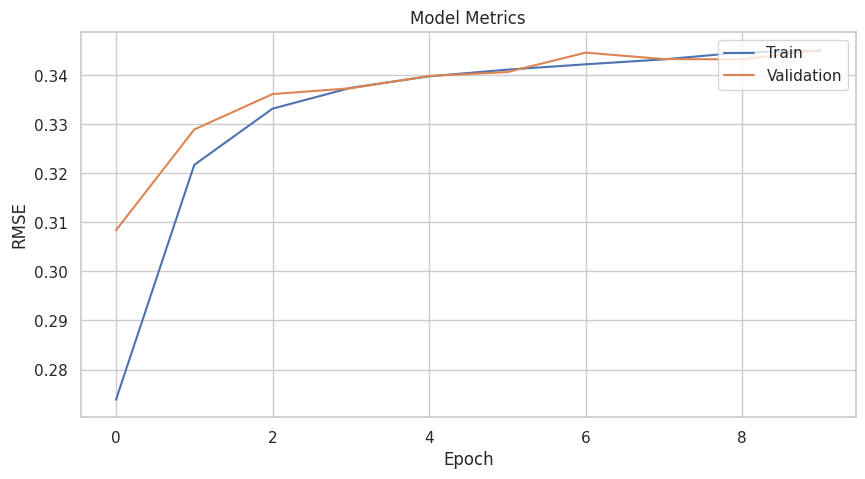

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model Metrics')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(True)
plt.show()

### Insight:

Visualisasi metrik root_mean_squared_error (RMSE) selama proses pelatihan model, membandingkan kinerja pada data pelatihan (Train) dan data validasi (Validation) seiring dengan bertambahnya Epoch. Kode di atas plot menunjukkan bahwa grafik ini dibuat menggunakan Matplotlib (plt.plot()) dengan mengambil data RMSE dari objek history model.

Dari grafik "Model Metrics", terlihat bahwa pada awal epoch, RMSE pelatihan (garis biru) dan RMSE validasi (garis oranye) keduanya meningkat. Sekitar epoch 2-3, RMSE validasi mulai berada di atas RMSE pelatihan dan terus meningkat perlahan hingga epoch 5-6, setelah itu cenderung stabil atau sedikit meningkat. Sementara itu, RMSE pelatihan juga meningkat tetapi dengan laju yang sedikit berbeda.

Tren di mana RMSE validasi lebih tinggi dari RMSE pelatihan dan keduanya menunjukkan peningkatan seiring waktu, terutama pada fase akhir pelatihan, merupakan indikasi kuat adanya overfitting. Ini berarti model mempelajari pola-pola spesifik dari data pelatihan secara berlebihan, termasuk noise, sehingga performanya menurun ketika dihadapkan pada data baru atau yang tidak terlihat (data validasi). Idealnya, kedua garis RMSE harus menunjukkan penurunan atau stabilisasi pada nilai rendah, dan garis validasi harus mengikuti garis pelatihan tanpa divergensi yang signifikan. Untuk meningkatkan kinerja model, perlu dipertimbangkan teknik-teknik untuk mengurangi overfitting seperti early stopping, regularisasi (L1, L2, dropout), atau penambahan data.

## Mendapatkan Rekomendasi

In [ ]:
movie_df = movies  # asumsi dataframe berisi metadata film
ratings_df = ratings  # data rating user

user_id = ratings_df.userId.sample(1).iloc[0]

movies_watched_by_user = ratings_df[ratings_df.userId == user_id]

movies_not_watched = movie_df[~movie_df['movieId'].isin(movies_watched_by_user.movieId.values)]['movieId']
movies_not_watched = list(set(movies_not_watched).intersection(set(movie_to_movie_encoded.keys())))
movies_not_watched = [[movie_to_movie_encoded.get(x)] for x in movies_not_watched]

user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movies_not_watched), movies_not_watched)
)


### **Insight:**

Mendemonstrasikan langkah-langkah awal untuk menghasilkan rekomendasi film bagi seorang pengguna tertentu dalam sistem rekomendasi. Prosesnya dimulai dengan mengambil data film (movie_df) dan data rating pengguna (ratings_df) sebagai input. Kemudian, secara acak dipilih seorang user_id dari data rating untuk dijadikan target rekomendasi.

Setelah user_id ditentukan, kode mengidentifikasi film-film yang telah ditonton oleh pengguna tersebut (movies_watched_by_user). Selanjutnya, langkah krusial adalah mengidentifikasi film-film yang belum ditonton oleh pengguna (movies_not_watched). Ini dilakukan dengan memfilter movie_df berdasarkan film-film yang belum ada dalam daftar tontonan pengguna dan memastikan bahwa film-film tersebut juga ada dalam daftar film yang diketahui oleh encoder (movie_to_movie_encoded). Terakhir, movies_not_watched diubah menjadi representasi yang di-encode. Bagian akhir kode menyiapkan input untuk model rekomendasi dengan membuat user_encoder untuk pengguna target dan menggabungkannya dengan daftar film yang belum ditonton, yang kemungkinan akan digunakan untuk memprediksi rating atau preferensi pengguna terhadap film-film tersebut.

In [ ]:
ratings = model.predict(user_movie_array).flatten()
top_ratings_indices = ratings.argsort()[-10:][::-1]

recommended_movie_ids = [
    movie_encoded_to_movie.get(movies_not_watched[x][0]) for x in top_ratings_indices
]

print(f"Showing recommendations for users: U{user_id:04d}")
print("=" * 30)

# Film dengan rating tertinggi dari user
print("\nFilm with high ratings from user")
print("-" * 30)

top_movies = (
    movies_watched_by_user.sort_values(by='rating', ascending=False)
    .head(5)
    .movieId.values
)

for m in movie_df[movie_df.movieId.isin(top_movies)].itertuples():
    print(f"{m.title}")

# Rekomendasi teratas
print("\nTop 10 movie recommendation")
print("-" * 30)

for m in movie_df[movie_df.movieId.isin(recommended_movie_ids)].itertuples():
    print(f"{m.title}")


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Showing recommendations for users: U110541

Film with high ratings from user
------------------------------
Star Wars: Episode IV - A New Hope (1977)
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)
Star Wars: Episode V - The Empire Strikes Back (1980)
Life Is Beautiful (La Vita è bella) (1997)
American History X (1998)

Top 10 movie recommendation
------------------------------
Shawshank Redemption, The (1994)
Godfather, The (1972)
Rear Window (1954)
North by Northwest (1959)
Godfather: Part II, The (1974)
Chinatown (1974)
M (1931)
Rashomon (Rashômon) (1950)
City of God (Cidade de Deus) (2002)
Dark Knight, The (2008)


### **Insight:**

Blok kode ini melanjutkan proses dari gambar sebelumnya, di mana user_movie_array (yang berisi kombinasi encoder pengguna dan film yang belum ditonton) digunakan sebagai input untuk model. Fungsi model.predict() kemudian menghasilkan prediksi rating atau preferensi untuk film-film tersebut. Setelah itu, top_ratings_indices dihitung untuk mendapatkan indeks dari 10 film teratas dengan prediksi rating tertinggi. Indeks-indeks ini kemudian digunakan untuk mengambil recommended_movie_ids yang sebenarnya dari daftar film yang belum ditonton, setelah di-decode kembali ke ID film asli.

Output di bagian bawah gambar menunjukkan hasil rekomendasi untuk user: U110541. Pertama, dicetak daftar "Film with high ratings from user", yang merupakan 5 film teratas yang telah ditonton dan diberi rating tinggi oleh pengguna tersebut. Ini berfungsi sebagai konteks untuk melihat preferensi pengguna di masa lalu. Kedua, dicetak "Top 10 movie recommendation", yang merupakan daftar 10 film yang direkomendasikan oleh model berdasarkan prediksi. Misalnya, Shawshank Redemption, The (1994) dan Godfather, The (1972) adalah beberapa film yang direkomendasikan. Perbandingan antara film yang telah ditonton dan film yang direkomendasikan dapat memberikan wawasan tentang relevansi dan keberhasilan sistem rekomendasi. Jika rekomendasi sesuai dengan genre atau tema film yang disukai pengguna di masa lalu, maka sistem bekerja dengan baik.

# **Kesimpulan**

**Model Collaborative Filtering**
- Kelebihan:
  - Mampu menemukan rekomendasi "serendipitous": Model ini dapat merekomendasikan item yang tidak terkait secara langsung dengan preferensi eksplisit pengguna (genre yang sama, aktor yang sama, dll.), tetapi disukai oleh pengguna lain dengan selera serupa. Misalnya, rekomendasi "Shawshank Redemption" atau "Godfather" kepada pengguna yang menyukai "Star Wars" bisa jadi merupakan serendipitous jika bukan karena genre yang sama.
  - Tidak memerlukan metadata item: Model ini hanya bergantung pada interaksi pengguna-item (misalnya rating), sehingga tidak memerlukan informasi mendalam tentang fitur-fitur item itu sendiri.
  - Mengakomodasi selera yang berubah: Jika selera pengguna berubah, model akan secara otomatis menyesuaikan rekomendasi berdasarkan interaksi baru dengan item lain.

- Kekurangan:
  - Masalah "Cold Start": Sulit untuk merekomendasikan item baru yang belum memiliki banyak interaksi, atau untuk pengguna baru yang belum memiliki riwayat interaksi yang cukup.
  - Masalah "Sparsity": Dataset rating seringkali sangat jarang (sparse), artinya sebagian besar pengguna hanya memberi rating pada sebagian kecil dari total item, yang dapat menyulitkan model untuk menemukan pola yang kuat.
  - Masalah "Popularity Bias": Cenderung merekomendasikan item-item populer yang sudah banyak berinteraksi, mengabaikan item-item niche yang mungkin relevan.

**Model Content-Based Filtering**
- Kelebihan:
  - Tidak ada masalah "Cold Start" untuk item baru: Selama item baru memiliki metadata (misalnya genre, deskripsi), item tersebut dapat segera direkomendasikan berdasarkan kesamaan konten.
  - Rekomendasi yang jelas dan dapat dijelaskan: Alasan di balik rekomendasi mudah dipahami (misalnya, "Anda suka 'Ice Age', jadi kami merekomendasikan 'Horton Hears a Who' karena keduanya bergenre Animasi Anak").
  - Mampu menangani pengguna baru: Jika pengguna baru memberikan beberapa preferensi awal (misalnya, genre favorit), rekomendasi dapat segera diberikan.
  - Mampu merekomendasikan item niche: Dapat merekomendasikan item yang kurang populer tetapi sangat mirip dengan preferensi pengguna.

- Kekurangan:
  - Terbatas pada konten yang diketahui: Model ini hanya dapat merekomendasikan item yang mirip dengan apa yang sudah disukai pengguna. Sulit untuk menemukan rekomendasi yang "serendipitous" atau di luar "lingkaran" preferensi yang ada.
  - Membutuhkan metadata item yang kaya: Kualitas rekomendasi sangat bergantung pada kelengkapan dan kualitas metadata item.
  - Over-specialization: Pengguna bisa terus-menerus mendapatkan rekomendasi yang sangat mirip, yang bisa jadi membosankan.

**Kesimpulan: Mana Model yang Lebih Baik?**

Tidak ada satu model yang secara inheren "lebih baik" dari yang lain secara mutlak; model terbaik seringkali adalah kombinasi atau hibrida dari keduanya.

Namun, berdasarkan output yang diberikan dan jenis masalah rekomendasi secara umum, Collaborative Filtering memiliki potensi yang lebih besar untuk memberikan rekomendasi yang lebih luas dan "serendipitous" kepada pengguna.
  - Output Collaborative Filtering (Top 10 movie recommendation) menunjukkan film-film seperti Shawshank Redemption, Godfather, dan Rear Window, yang secara genre sangat berbeda dari "Star Wars" yang disukai pengguna, namun bisa jadi relevan karena disukai oleh pengguna lain dengan selera serupa. Ini menunjukkan kemampuan model untuk melampaui kesamaan konten eksplisit.
  - Output Content-Based Filtering (Dapatkan rekomendasi film yang mirip dengan 'Ice Age (2002)') secara logis merekomendasikan film-film yang memiliki genre yang sama (Adventure Animation Children Comedy), yang meskipun relevan, mungkin tidak mengejutkan atau memperkenalkan pengguna pada film di luar zona nyamannya.

**Model Collaborative Filtering** cenderung lebih canggih dalam menangkap pola perilaku pengguna dan dapat menemukan hubungan tersembunyi antara item dan pengguna yang tidak dapat ditangkap oleh Content-Based Filtering. Meskipun memiliki tantangan seperti cold start dan sparsity, banyak teknik telah dikembangkan untuk mengatasinya (misalnya, menggunakan Content-Based Filtering untuk cold start, atau matriks faktorisasi dan teknik deep learning untuk sparsity).

**Rekomendasi: Untuk kasus umum sistem rekomendasi film, pendekatan Collaborative Filtering (atau hibrida yang menggabungkannya) cenderung lebih unggul karena kemampuannya untuk memberikan rekomendasi yang lebih beragam dan berpotensi "mengejutkan" (serendipitous) kepada pengguna, yang seringkali menjadi tujuan utama sistem rekomendasi.**